<a href="https://colab.research.google.com/github/Pterjudin/Bankruptcy-Prediction/blob/master/Tajudeen_Tajudeen_3929498_SAM_April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

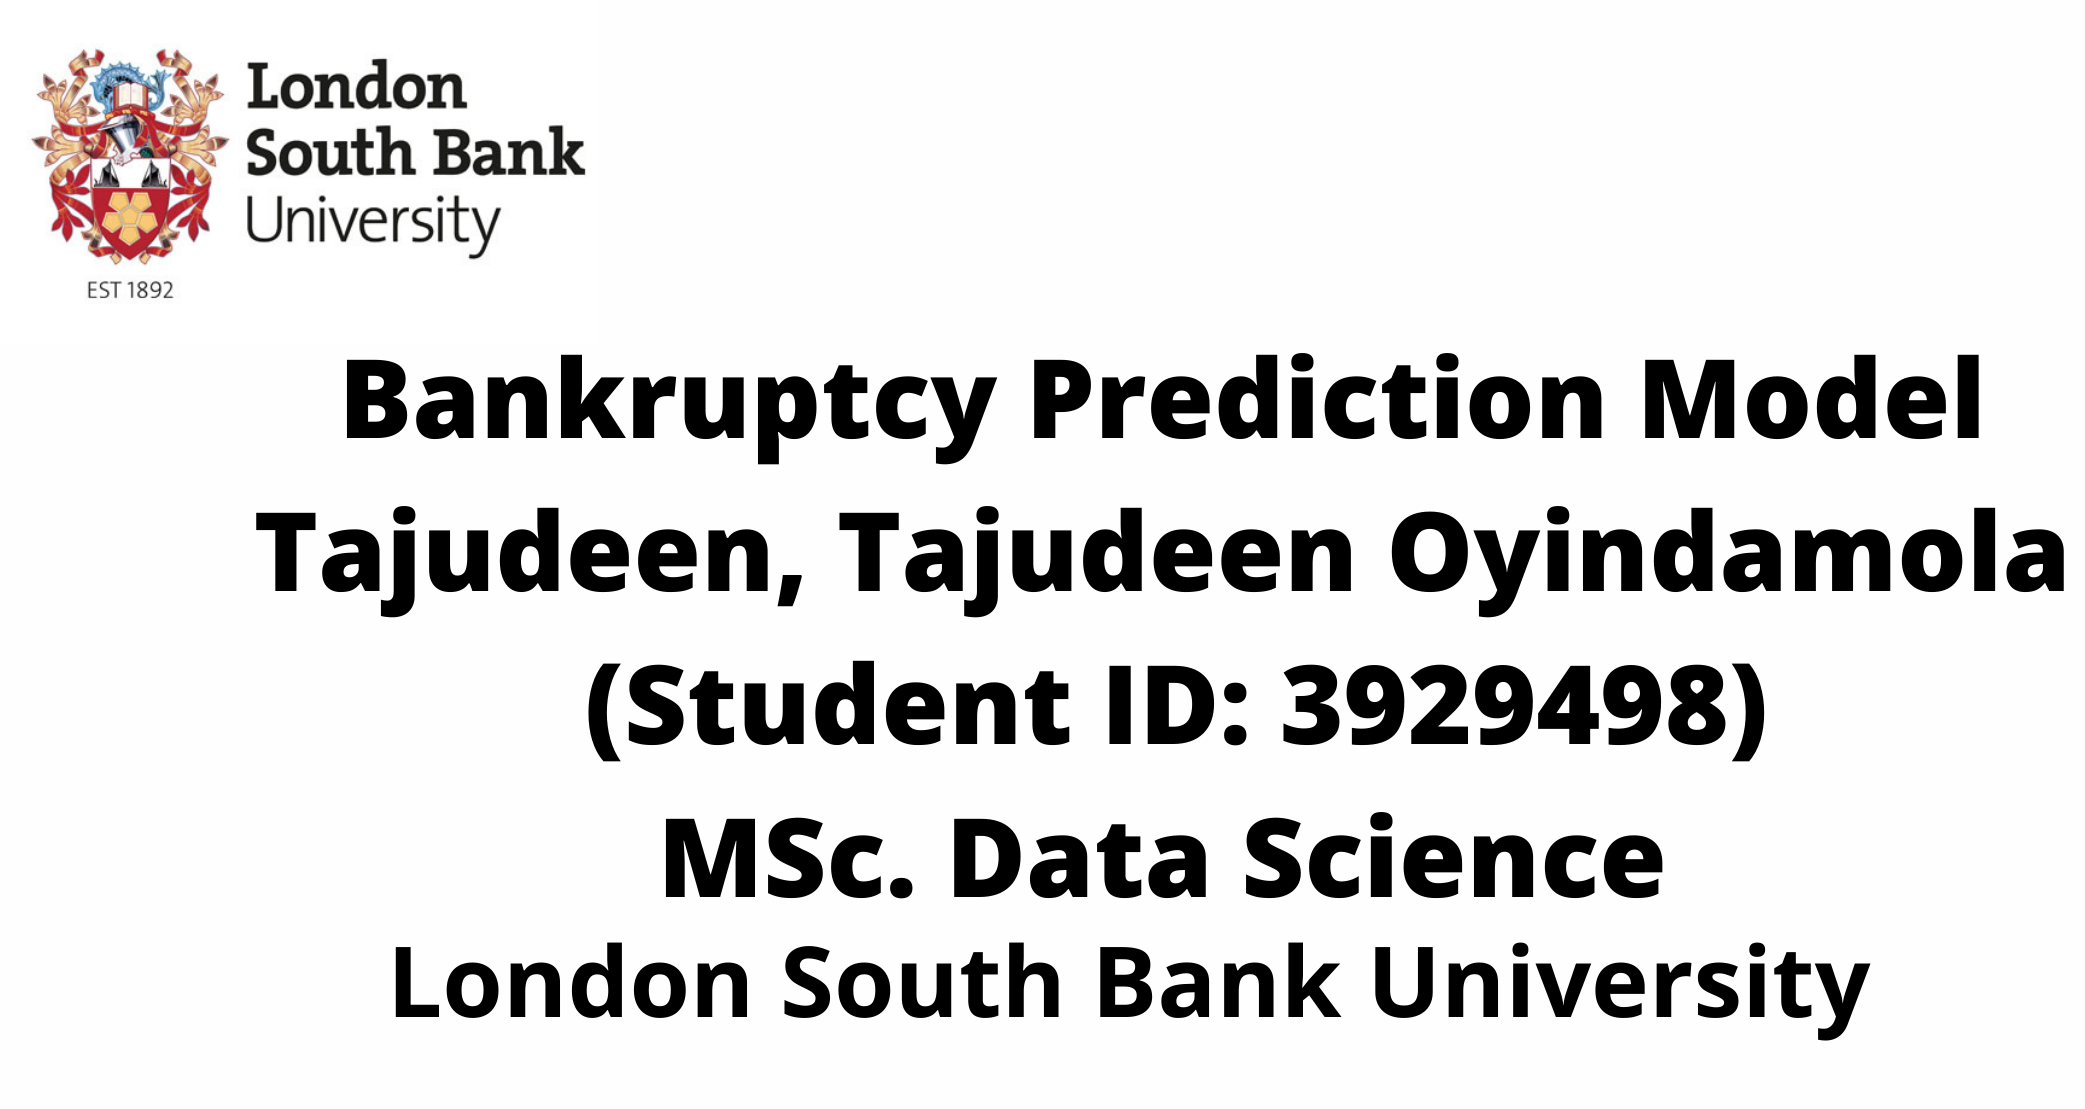

<h1> Table of Contents</h1>  
<ol>
    <b><li>Importing Needed Libraries</li></b>
    <li><b>Loading data</b>
    <li><b>Exploratory Data Analysis and Preprocessing</b>
    <li><b>Data Modeling</b>
        <ol>
            <li>K-Fold Cross validation</li>
            <li>Models
                <ol>
                    <li>Gaussian Naive Bayes classifier</li>
                    <li>Logistic Regression classifier</li>
                    <li>Decision Tree classifier</li>
                    <li>Random Forest classifier</li>
                    <li>Extreme Gradient Boosting classifier</li>
                    <li>Linear Regression</li>
                </ol>
            </li>
        </ol>
    </li>
</ol>

<center><i>1. Importing Needed Libraries</i></center>

In [2]:
# Importing Needed Python Libraries.
# To Remove Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

<center><i>2. Loading Data</i></center>

Create a path to the data.   
Load the CSV file given and convert it into a pandas dataframes using the `load_dataframes` function.     
Print the first 10 rows of a dataframe, to see how the data looks like.

In [2]:
# Creating Path to the Dataset
path = '/content/bankrupt.csv'

# Creating a function that helps to read the data 
def load_data(data_path):
  """
    This function loads the CSV path into a pandas dataframe
    INPUT: CSV File
    OUTPUT: Pandas Dataframe
  """
  return pd.read_csv(data_path)


# Taking a quick look at the data
bankrupt_data = load_data(path)
bankrupt_data.head(10)

Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490
5          1  ...              0.019534
6          0  ...              0.015663
7          0  ...              0.034889
8          0  ...              0.065826
9          0  ...              0.030801

[10 rows x 96 columns]

Print the last 10 data points to see how it looks.

In [3]:
# Checking the tail of the dataset
bankrupt_data.tail(10)

Bankrupt?  ...   Equity to Liability
6809          0  ...              0.031177
6810          0  ...              0.025787
6811          0  ...              0.043531
6812          0  ...              0.061753
6813          0  ...              0.024803
6814          0  ...              0.029890
6815          0  ...              0.038284
6816          0  ...              0.097649
6817          0  ...              0.044009
6818          0  ...              0.233902

[10 rows x 96 columns]

<center><i>3. Exploratory Data Analysis.</i></center>

In [4]:
# Checking the shape of the dataset
bankrupt_data.shape
# We can see that we have 6819 data points and 96 variables.  

(6819, 96)

In [5]:
# Checking the name of the columns in the dataset
bankrupt_data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
# Checking the number of unique values in the dataset
bankrupt_data.nunique()

Bankrupt?                                                      2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6240
 Interest Coverage Ratio (Interest expense to EBIT)         6240
 Net Income Flag                                               1
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [7]:
# Getting a quick description of the data.
bankrupt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
#  Checking the summary of the data.
bankrupt_data.describe()

Bankrupt?  ...   Equity to Liability
count  6819.000000  ...           6819.000000
mean      0.032263  ...              0.047578
std       0.176710  ...              0.050014
min       0.000000  ...              0.000000
25%       0.000000  ...              0.024477
50%       0.000000  ...              0.033798
75%       0.000000  ...              0.052838
max       1.000000  ...              1.000000

[8 rows x 96 columns]

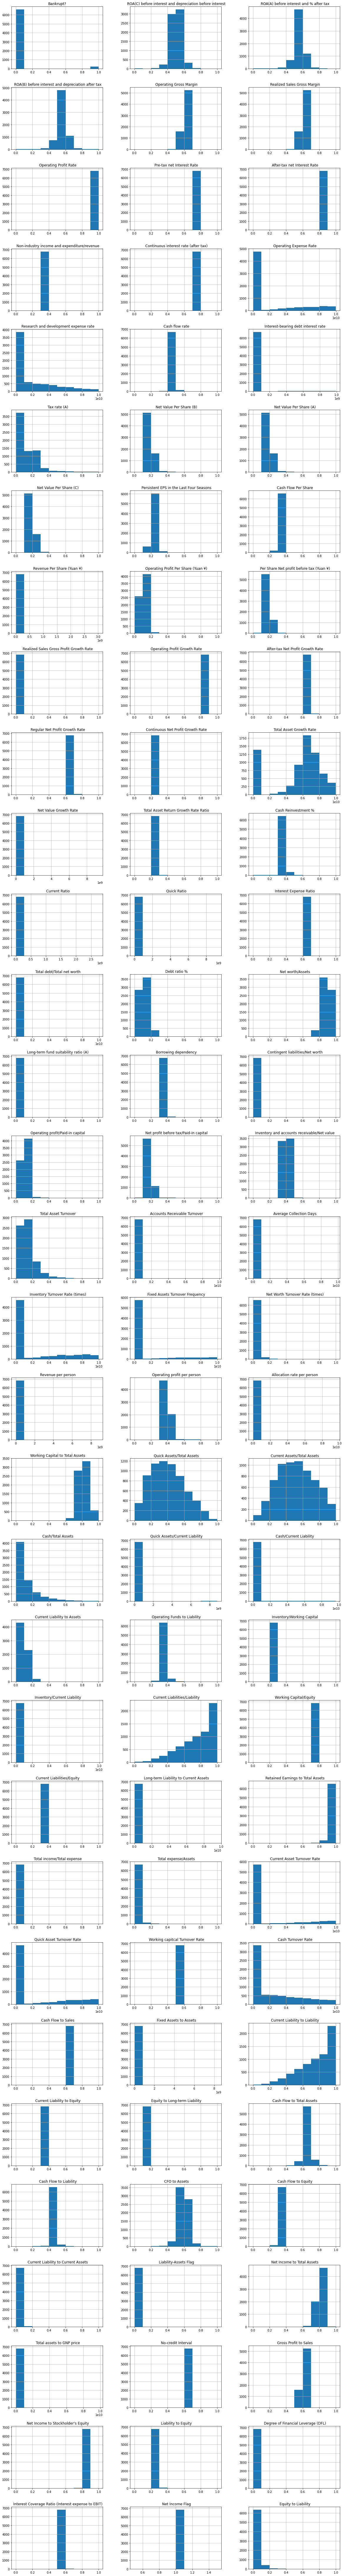

In [9]:
# Plotting an Histogram of the whole dataset to understand the data more.
bankrupt_data.hist(bins=10, figsize=(20,160), layout=(32,3))
plt.show()


In [10]:
# Checking correlations in the dataset
correlation = bankrupt_data.corr()
correlation

Bankrupt?  ...   Equity to Liability
Bankrupt?                                            1.000000  ...             -0.083048
 ROA(C) before interest and depreciation before...  -0.260807  ...              0.052416
 ROA(A) before interest and % after tax             -0.282941  ...              0.057887
 ROA(B) before interest and depreciation after tax  -0.273051  ...              0.056430
 Operating Gross Margin                             -0.100043  ...              0.120029
...                                                       ...  ...                   ...
 Liability to Equity                                 0.166812  ...             -0.159654
 Degree of Financial Leverage (DFL)                  0.010508  ...             -0.016739
 Interest Coverage Ratio (Interest expense to E...  -0.005509  ...             -0.008339
 Net Income Flag                                          NaN  ...                   NaN
 Equity to Liability                                -0.083048  ...              1.000000

[96 rows x 96 columns]

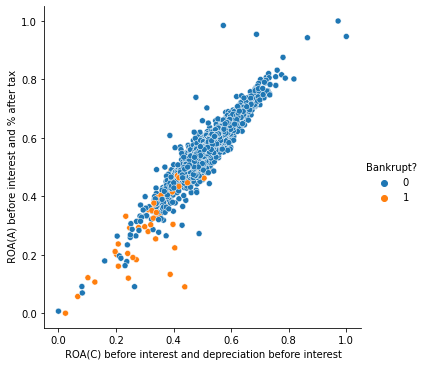

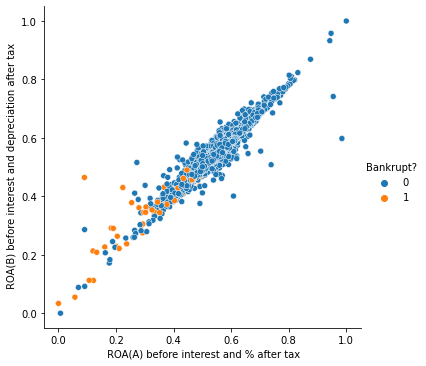

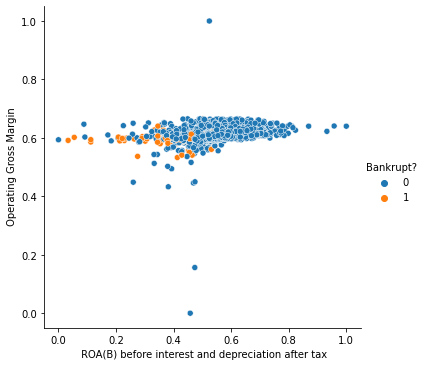

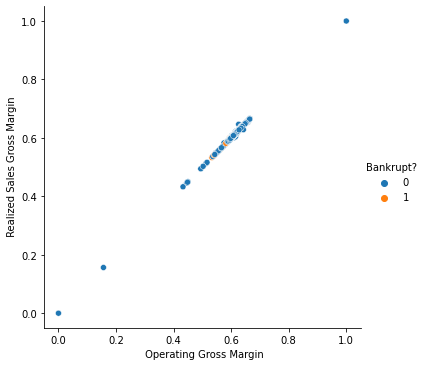

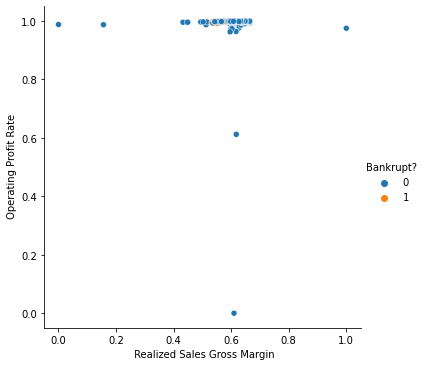

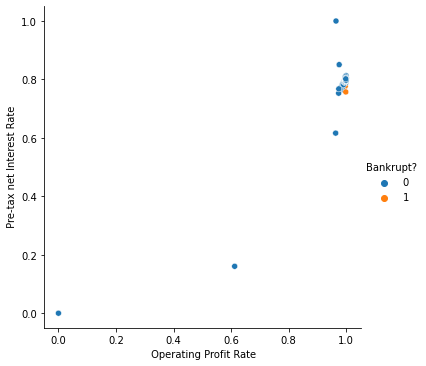

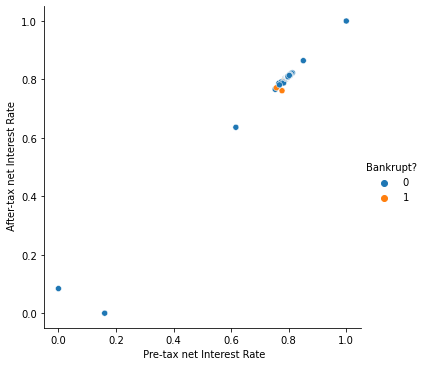

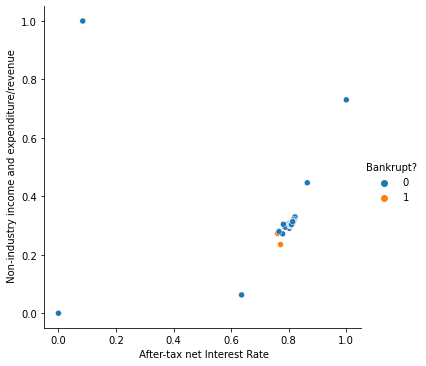

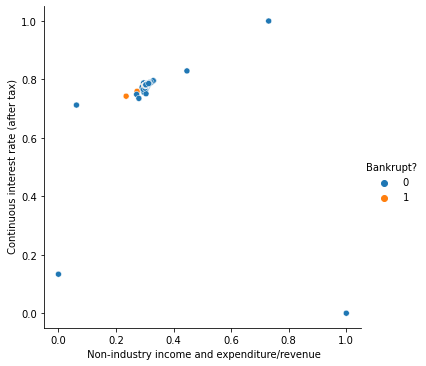

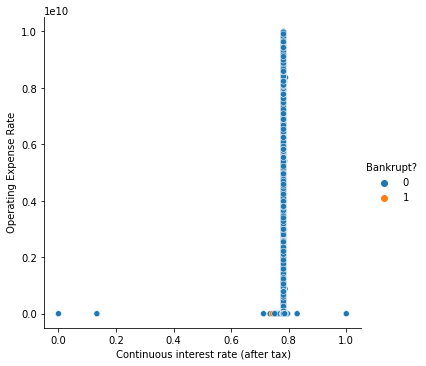

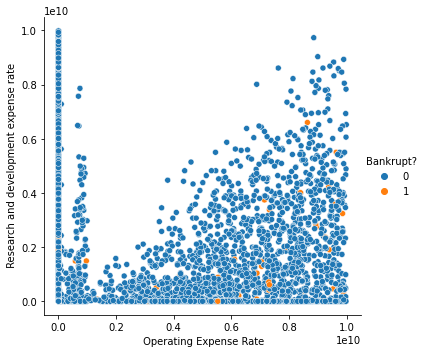

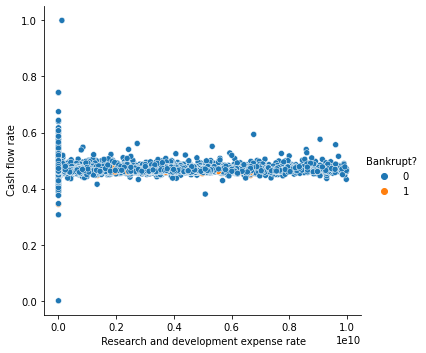

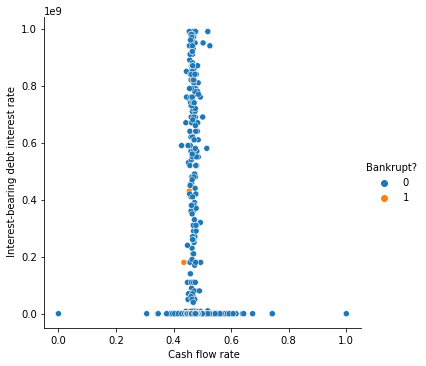

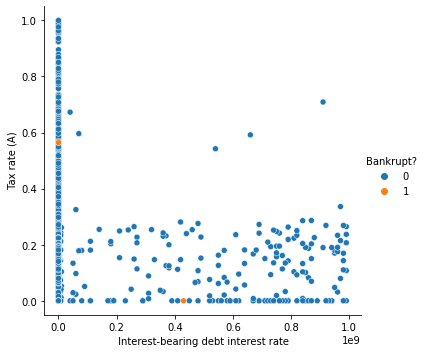

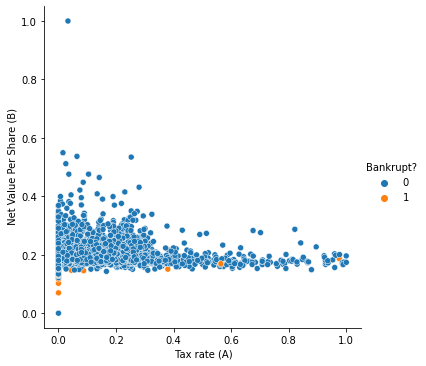

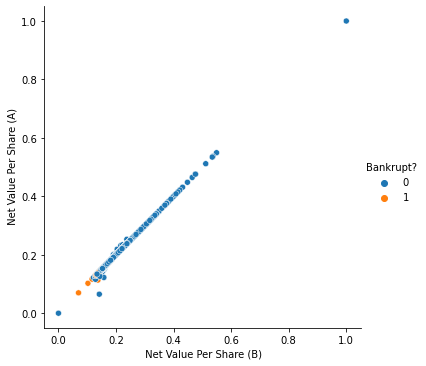

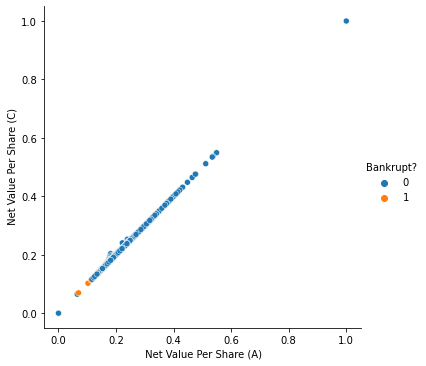

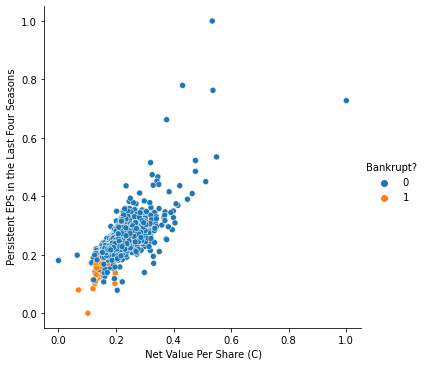

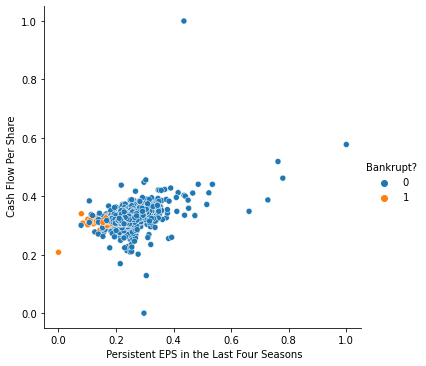

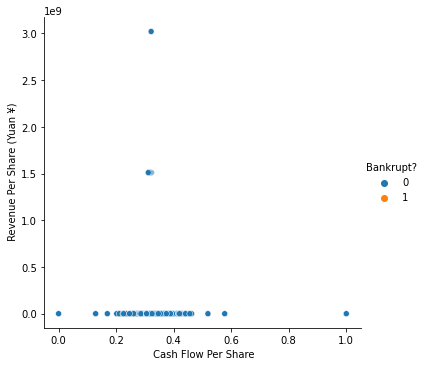

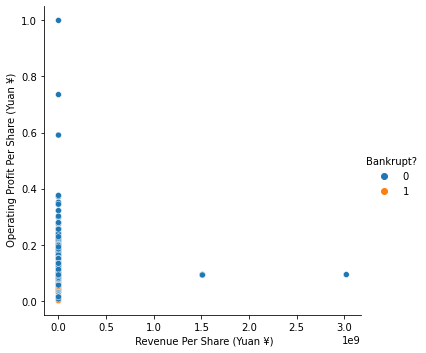

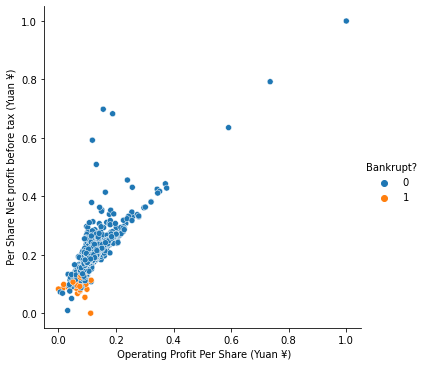

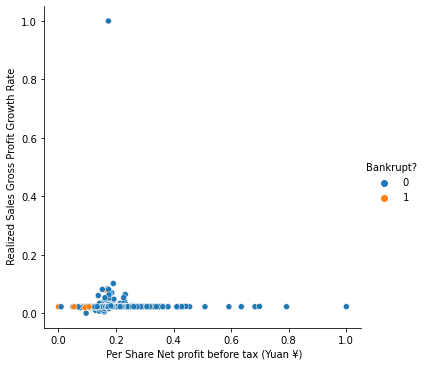

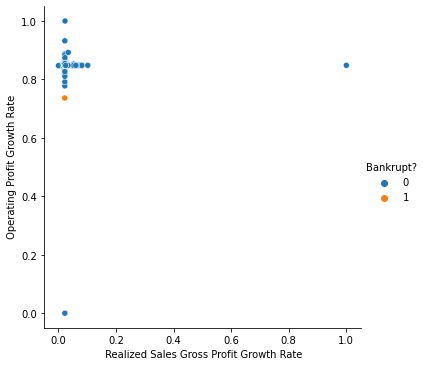

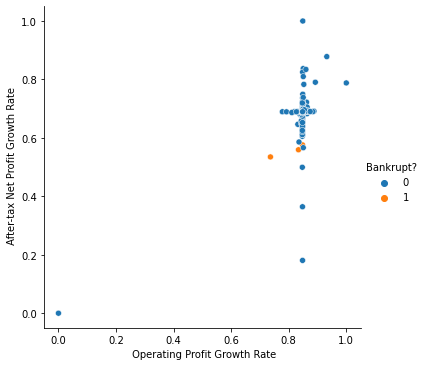

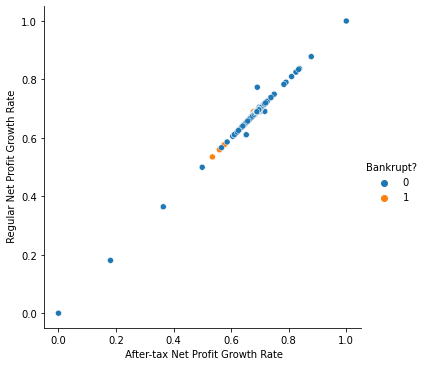

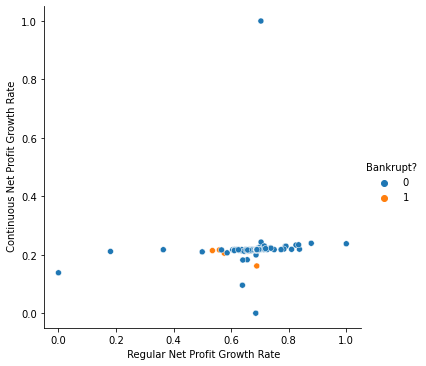

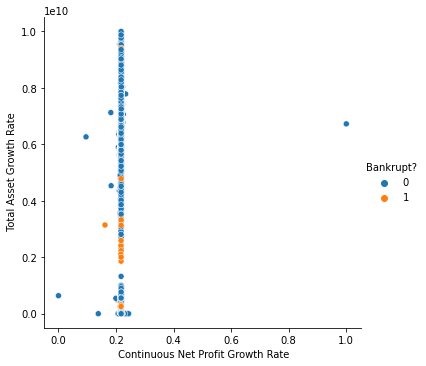

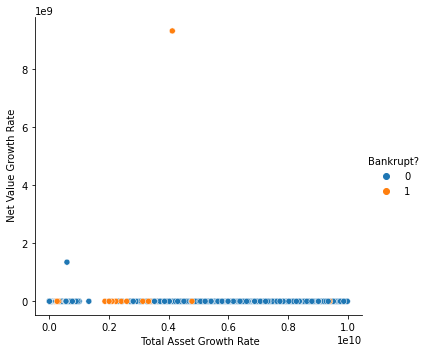

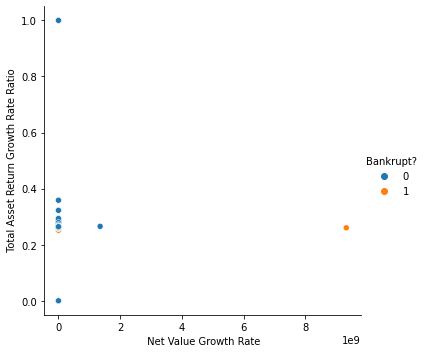

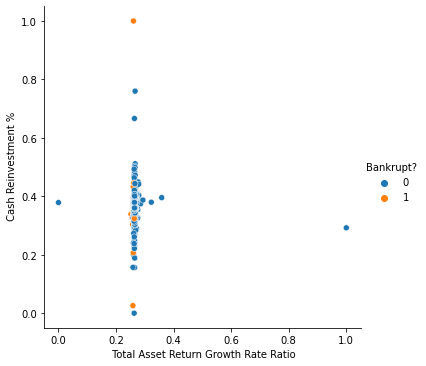

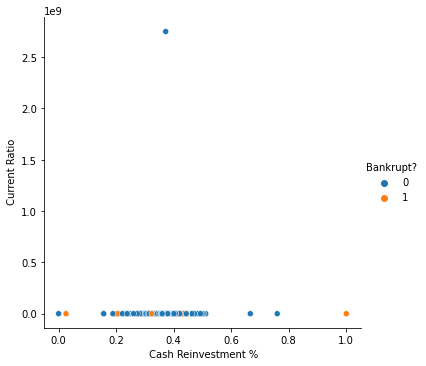

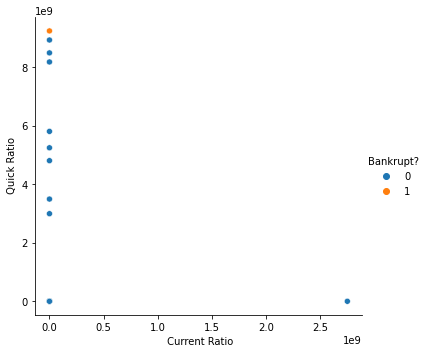

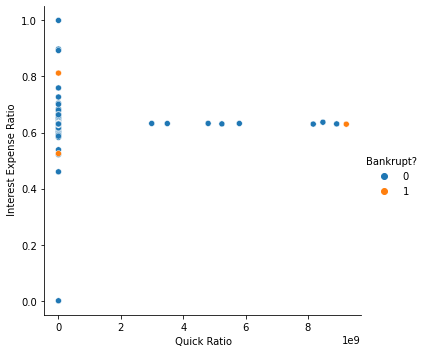

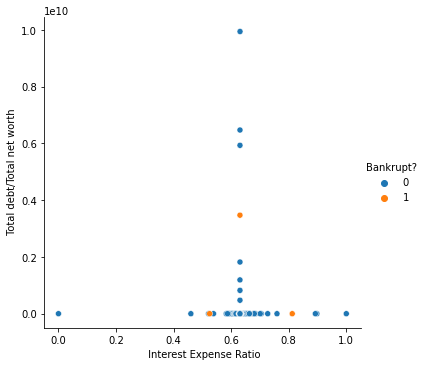

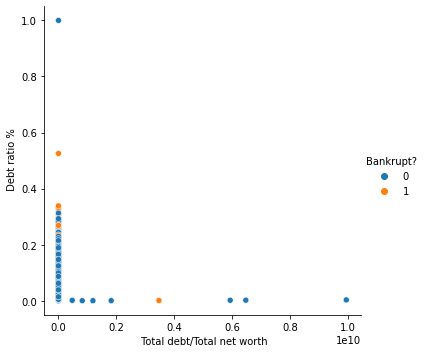

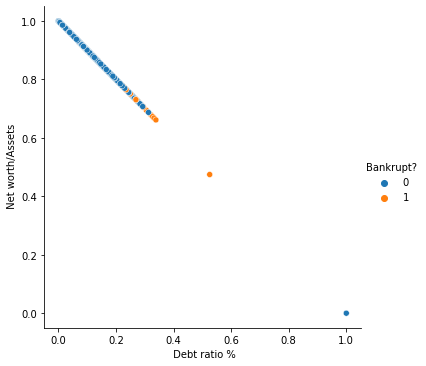

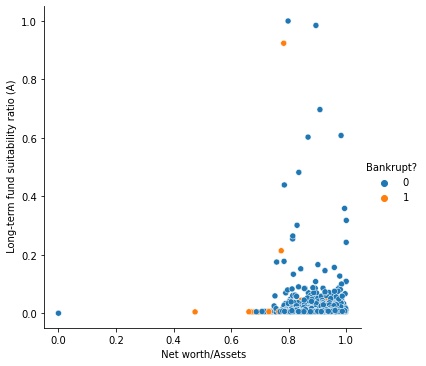

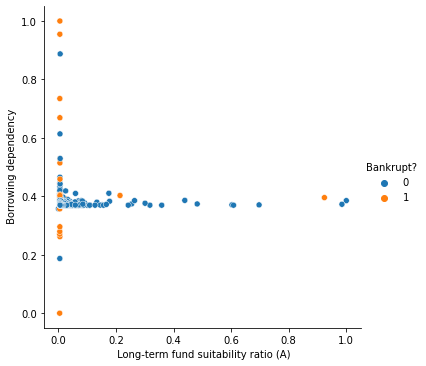

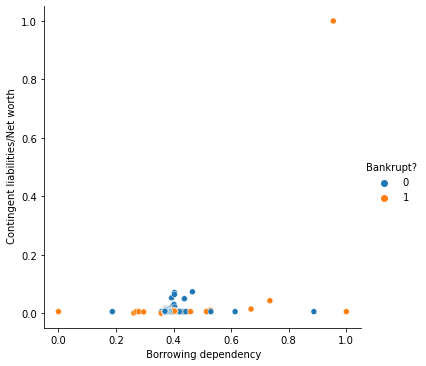

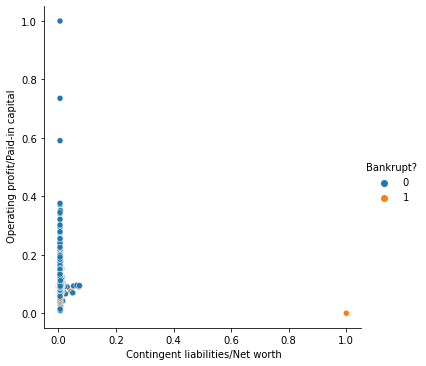

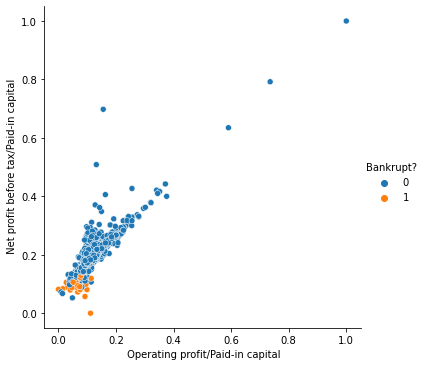

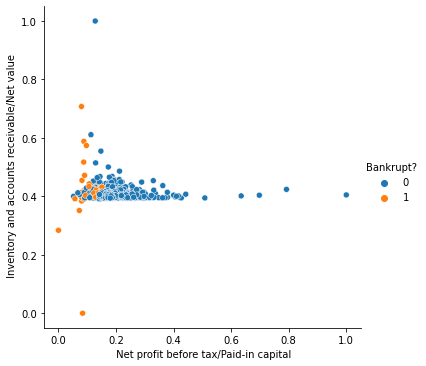

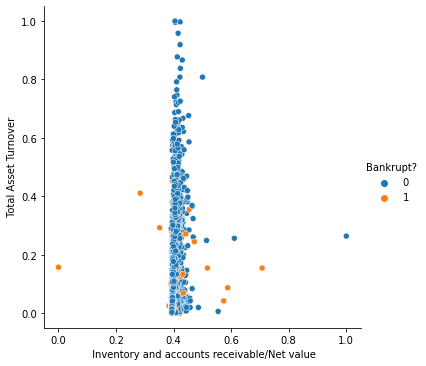

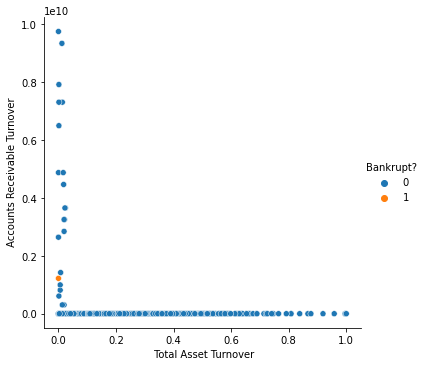

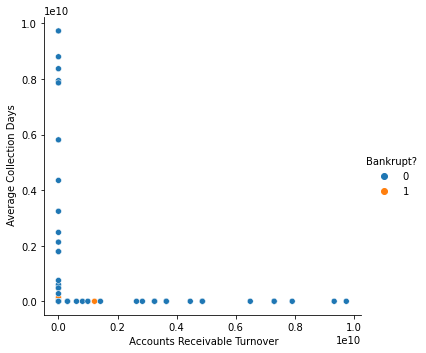

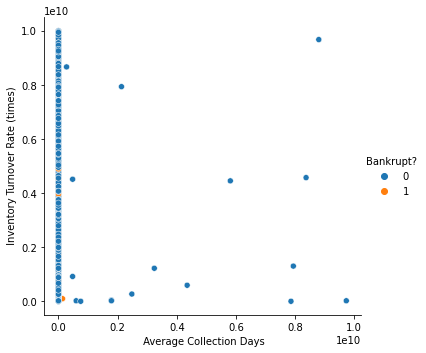

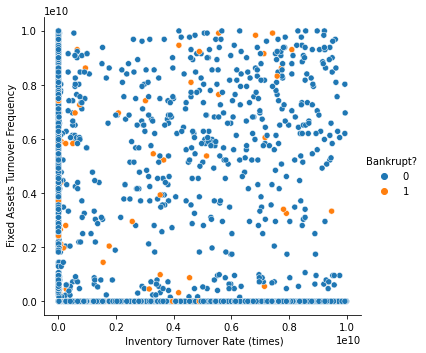

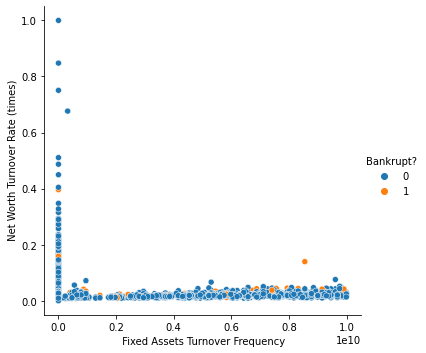

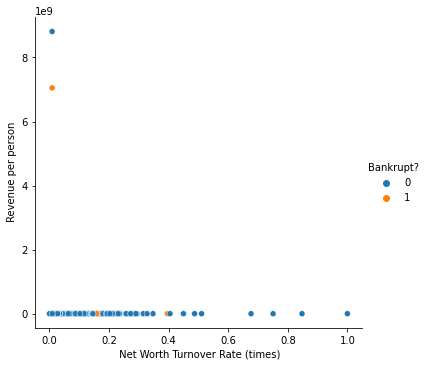

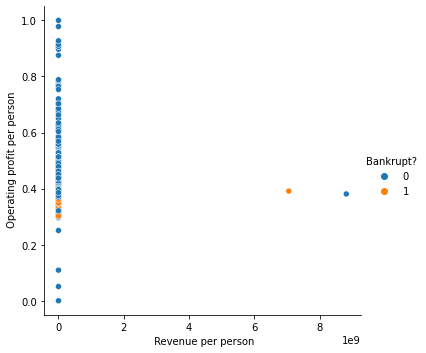

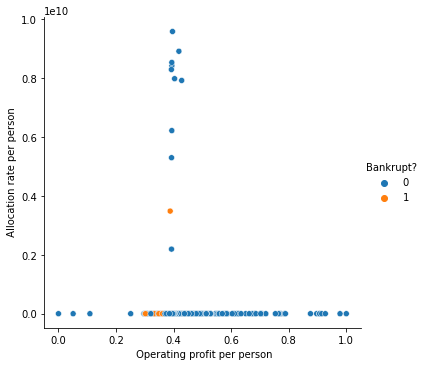

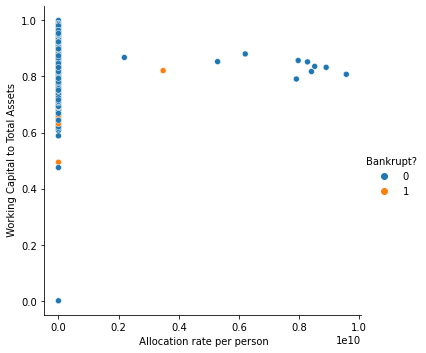

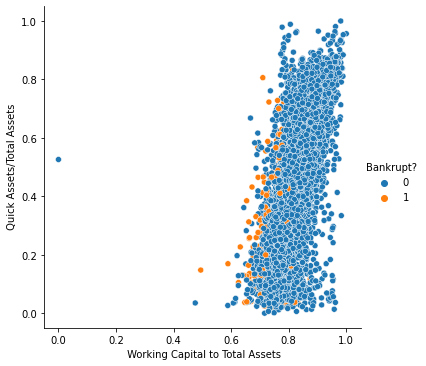

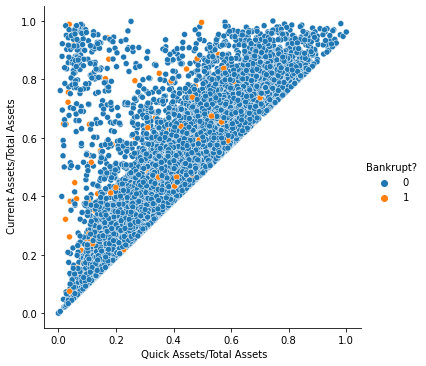

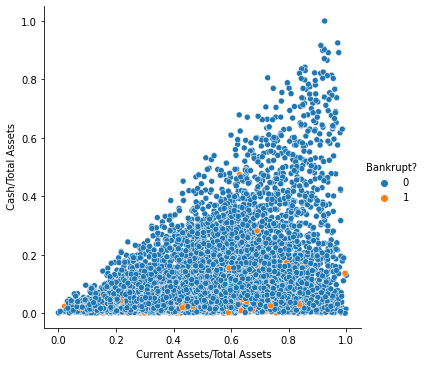

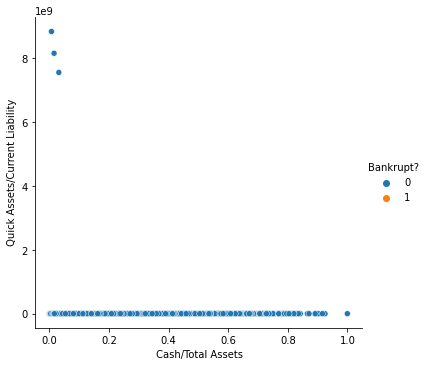

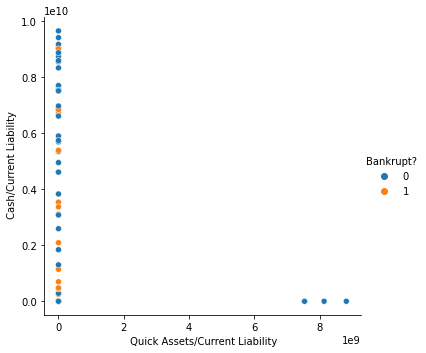

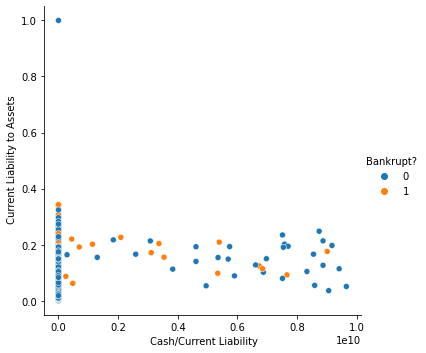

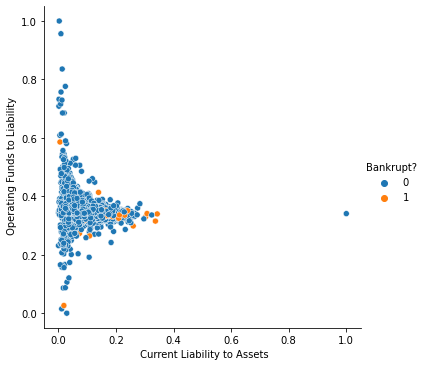

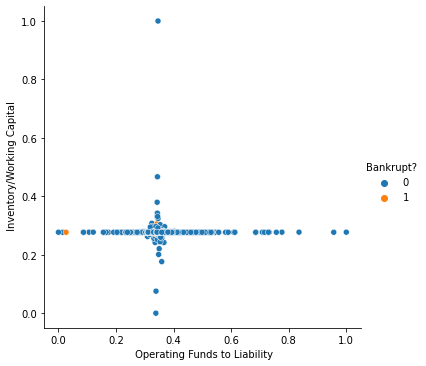

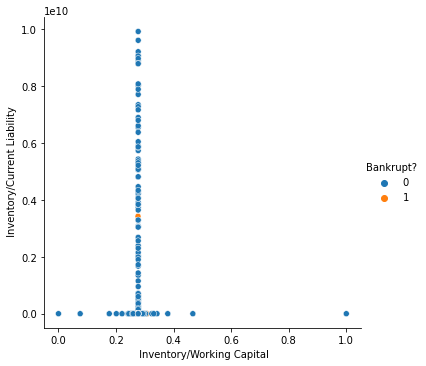

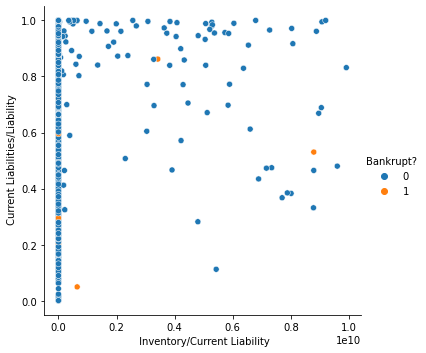

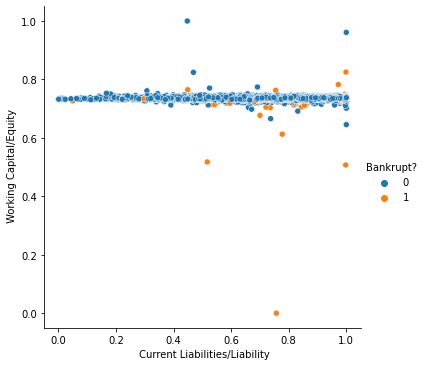

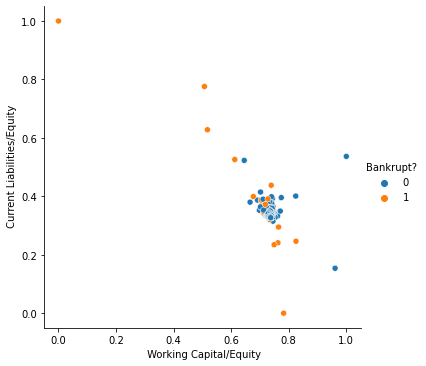

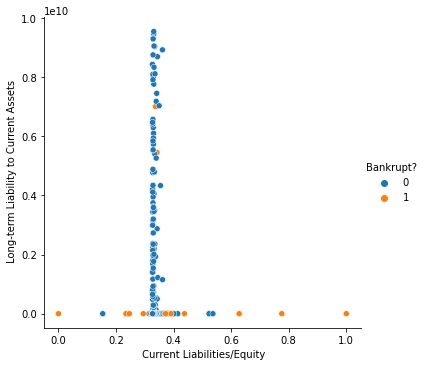

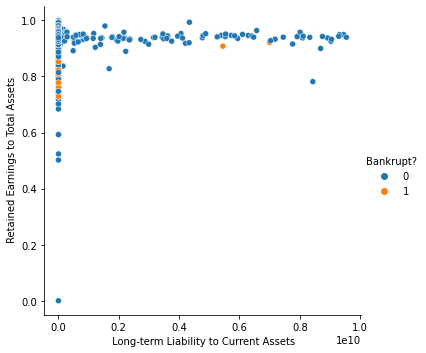

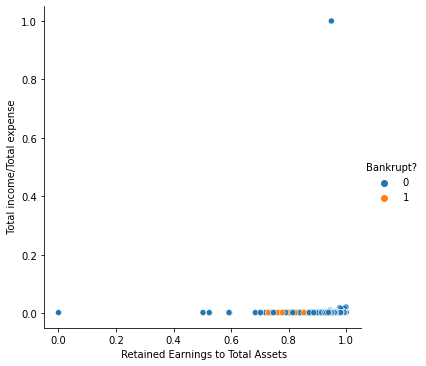

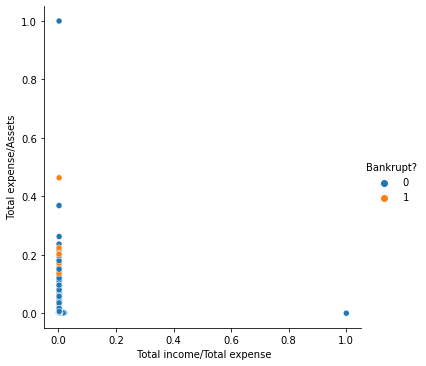

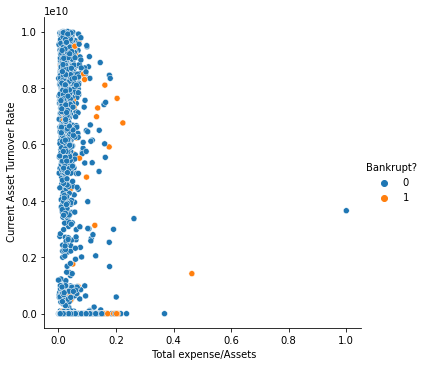

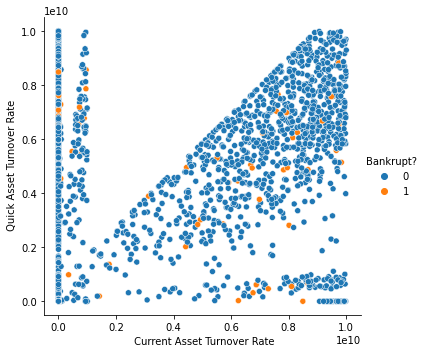

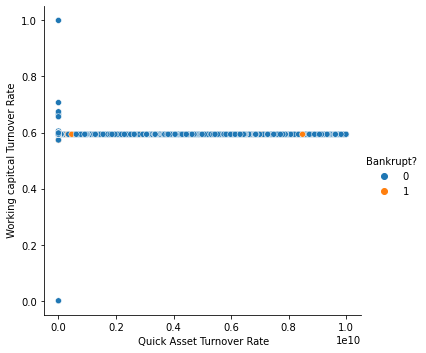

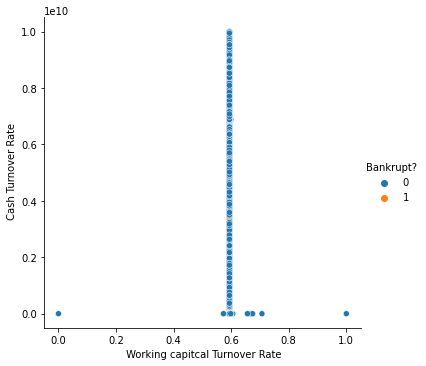

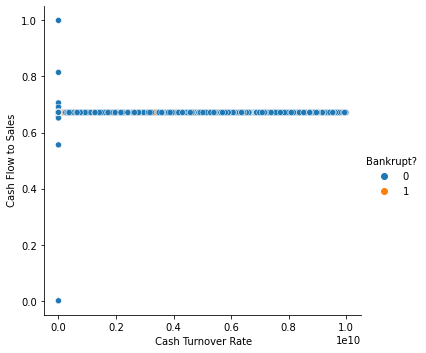

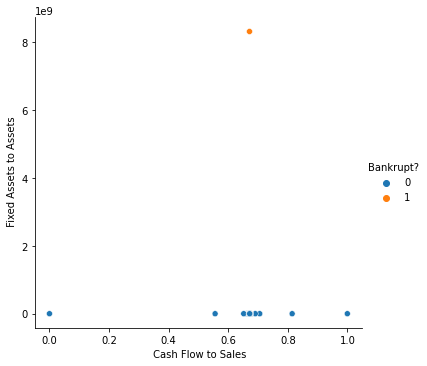

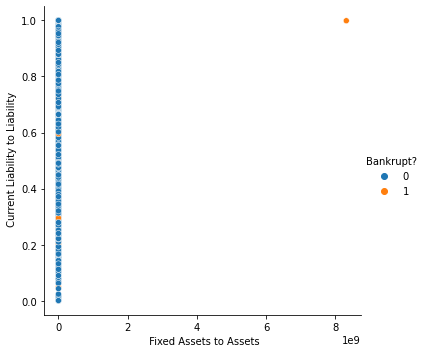

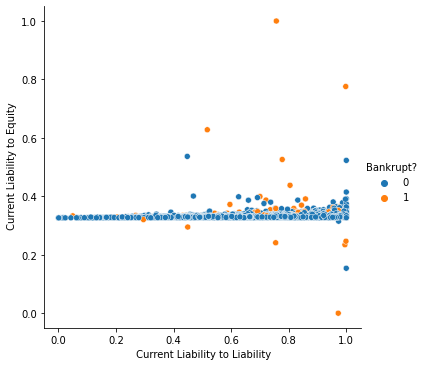

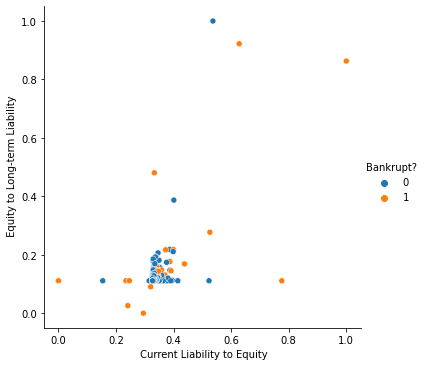

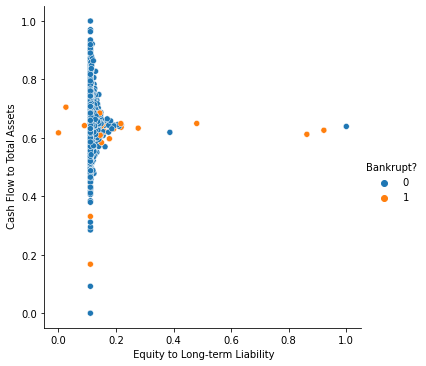

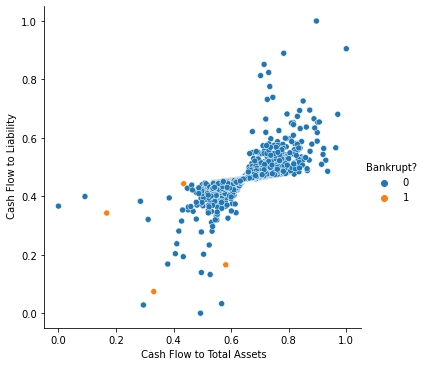

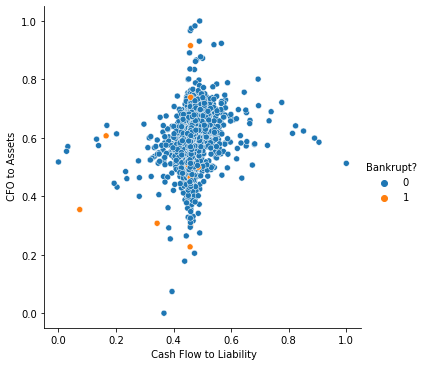

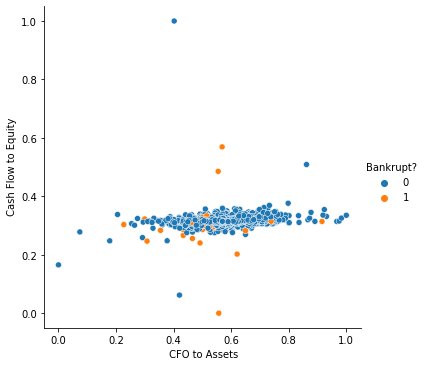

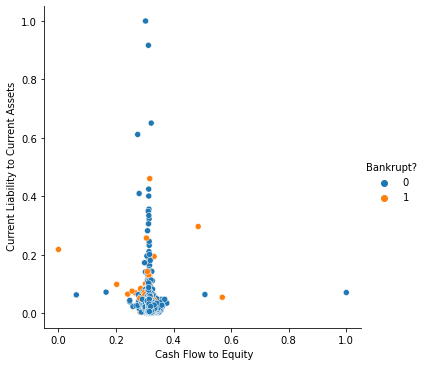

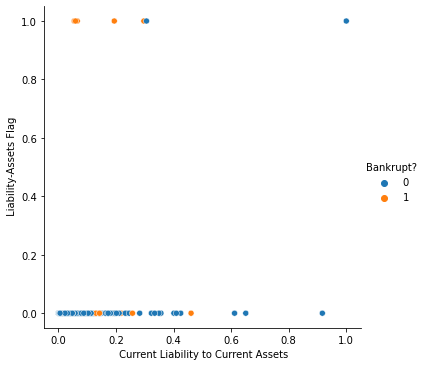

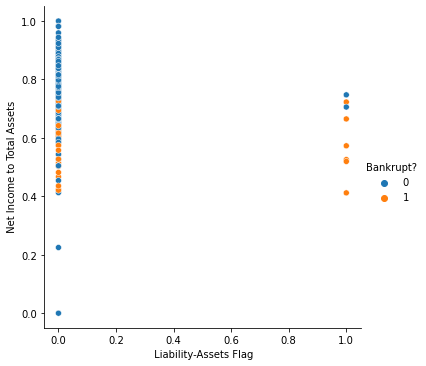

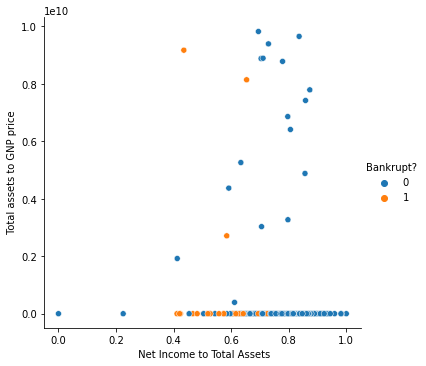

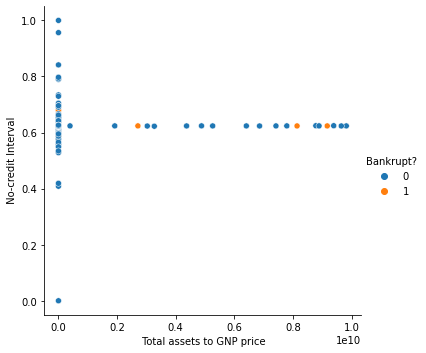

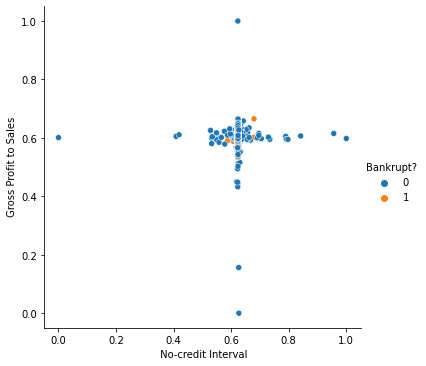

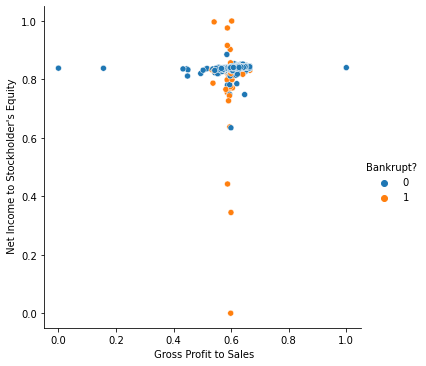

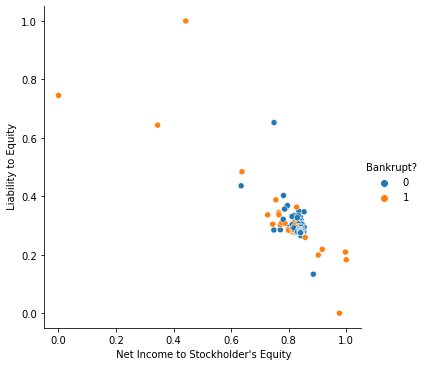

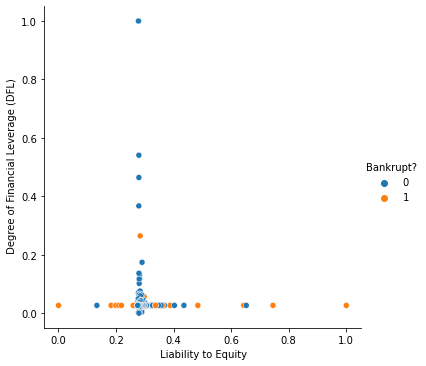

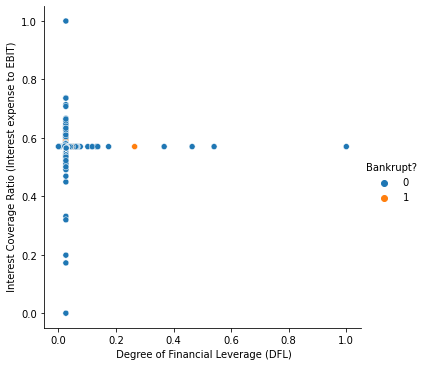

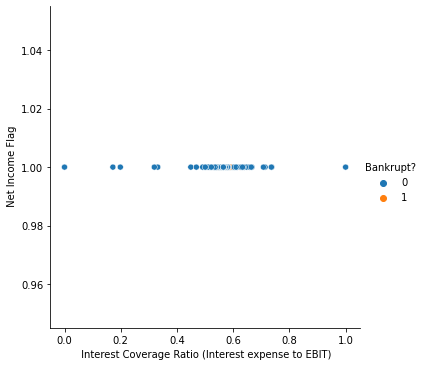

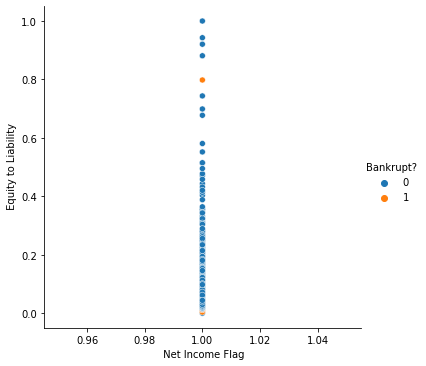

In [11]:
# Creating a relationship plot for all the data points
columns = bankrupt_data.columns
for i in range(1,len(columns)-1):
    sns.relplot(x=columns[i], y=columns[i+1], hue=columns[0], data=bankrupt_data)

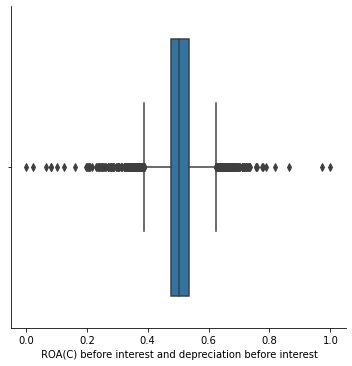

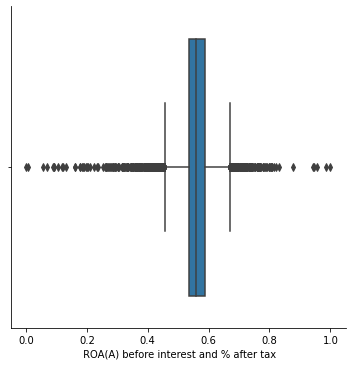

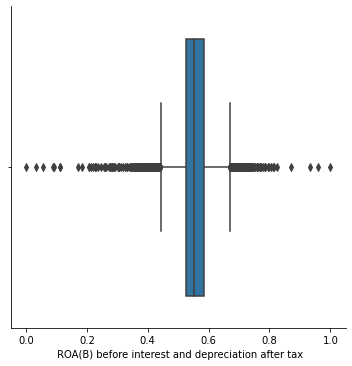

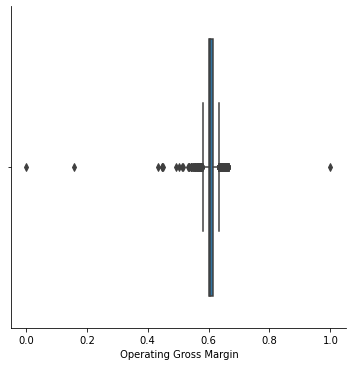

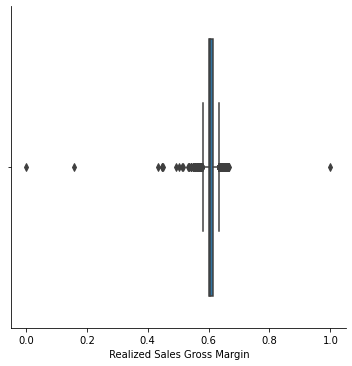

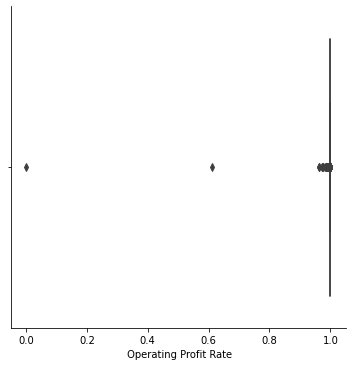

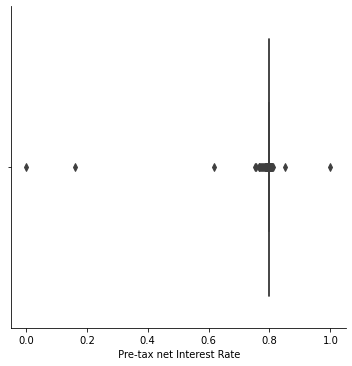

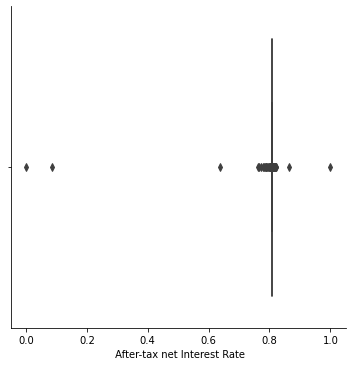

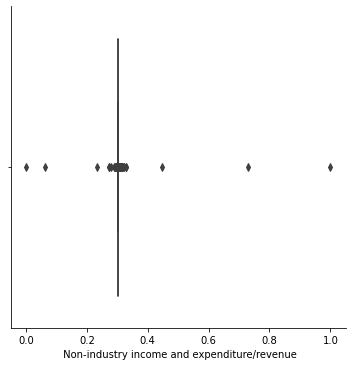

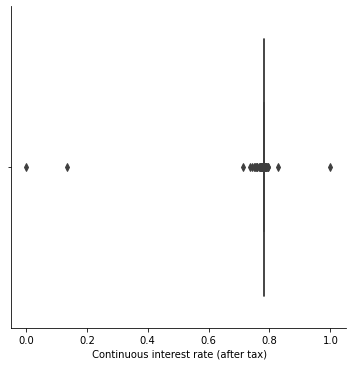

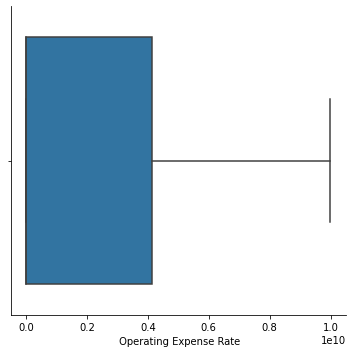

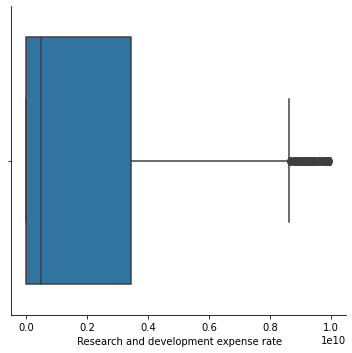

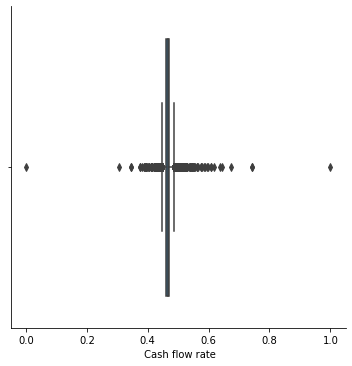

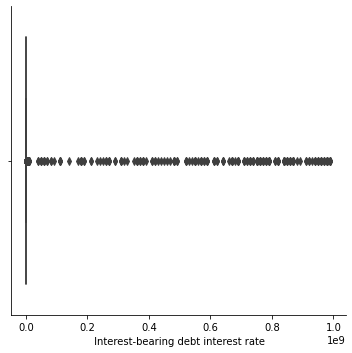

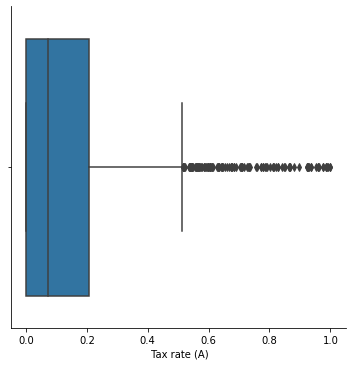

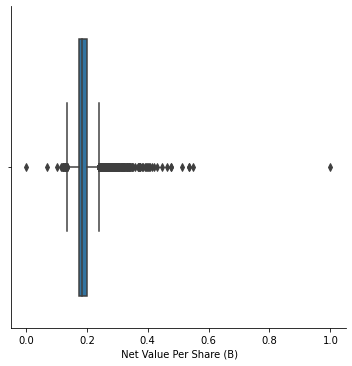

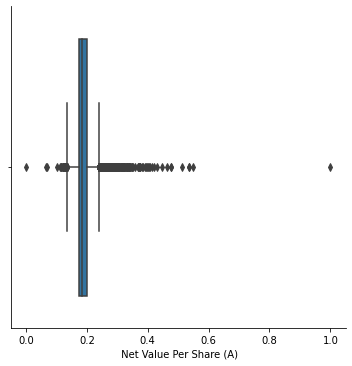

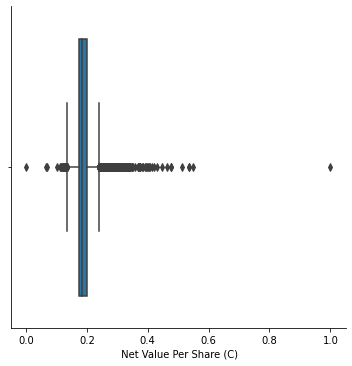

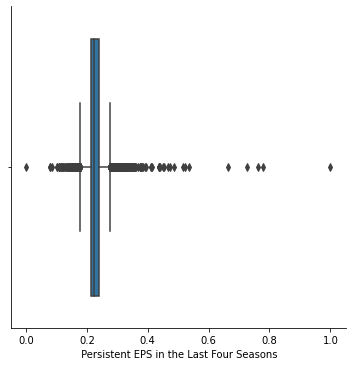

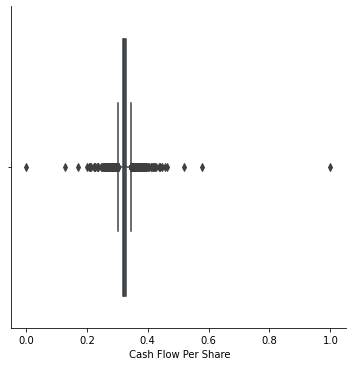

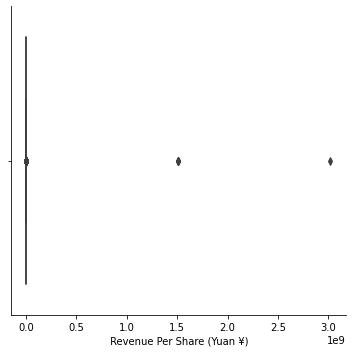

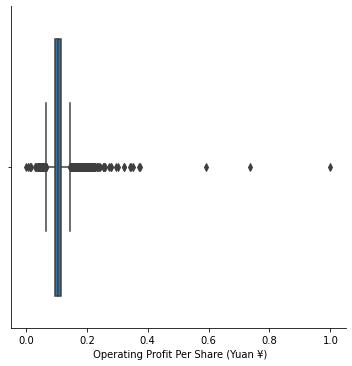

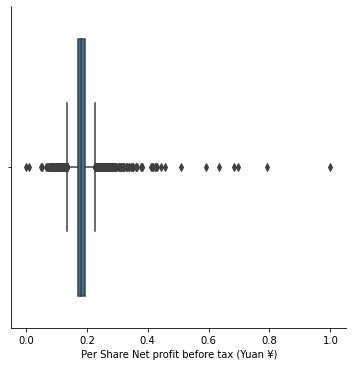

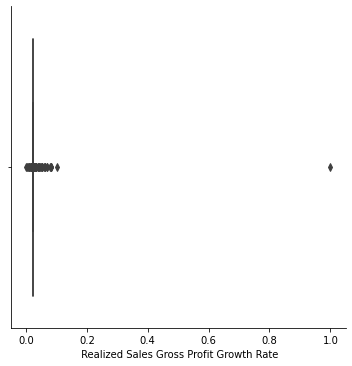

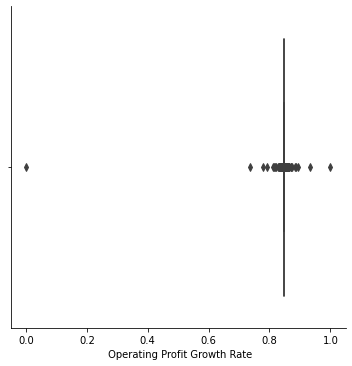

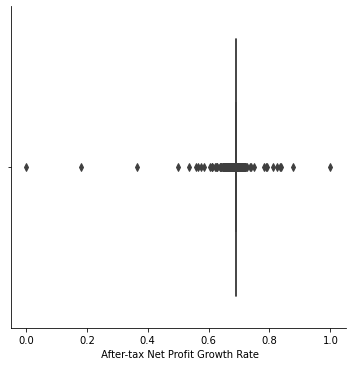

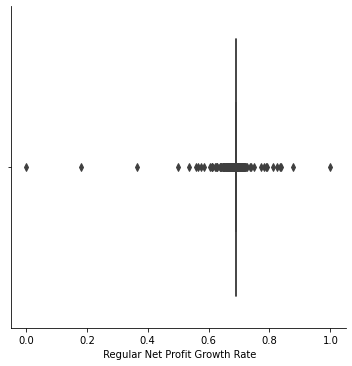

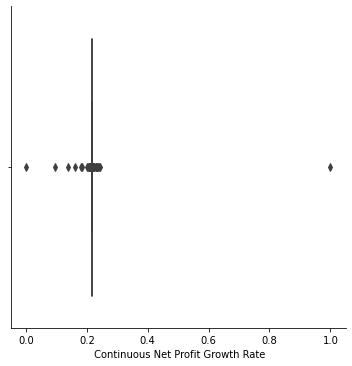

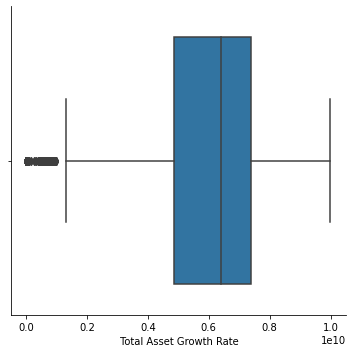

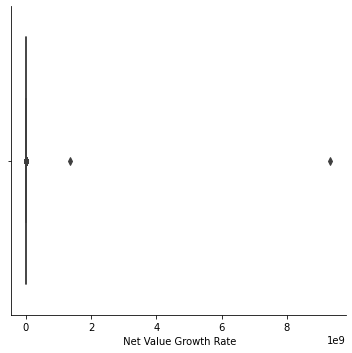

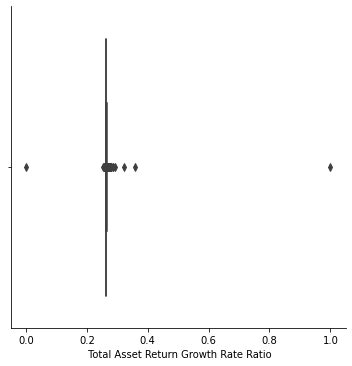

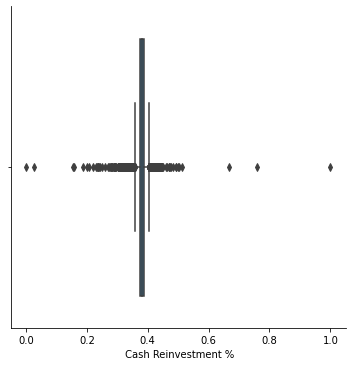

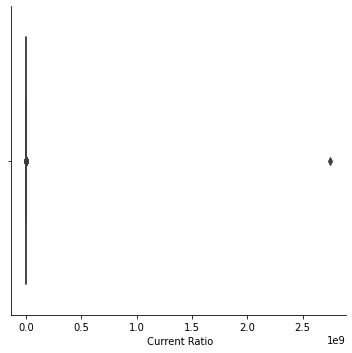

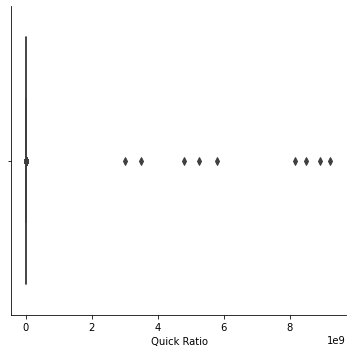

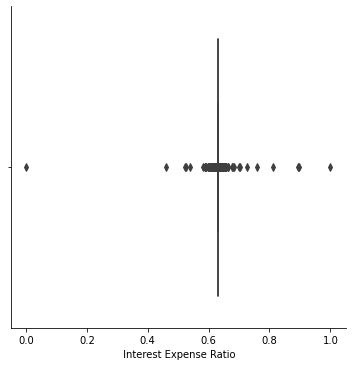

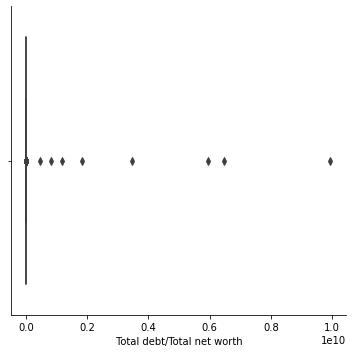

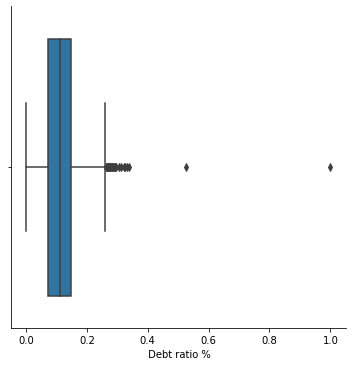

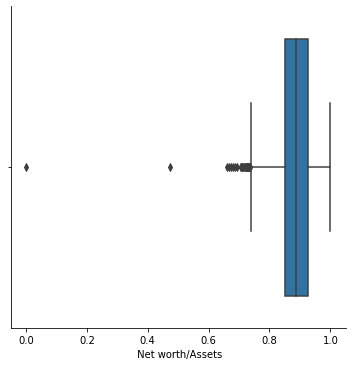

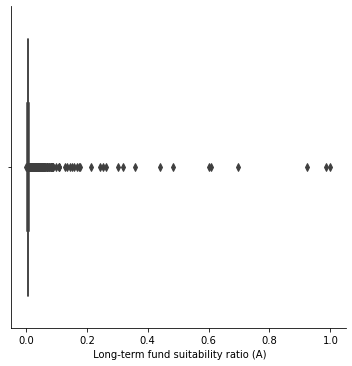

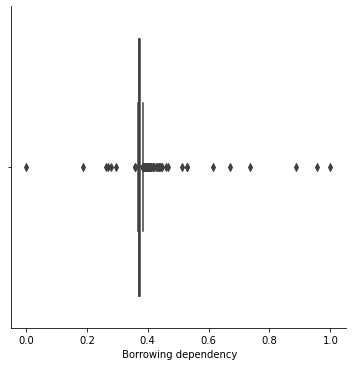

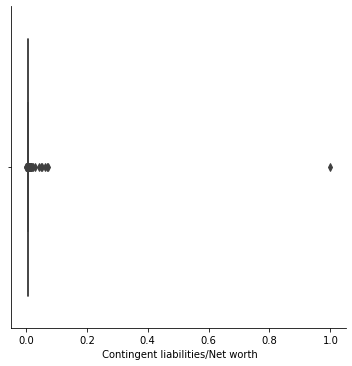

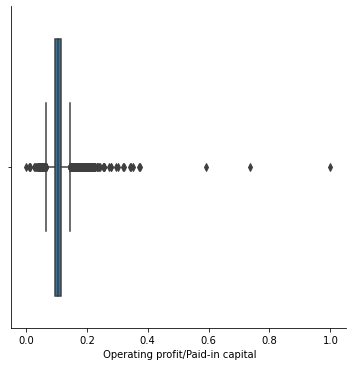

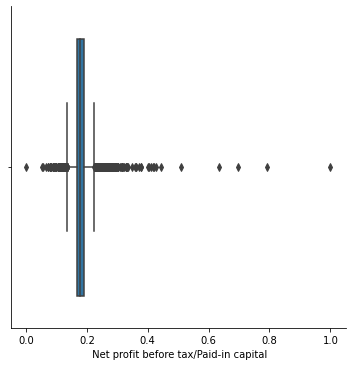

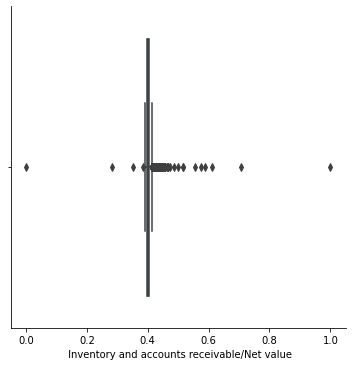

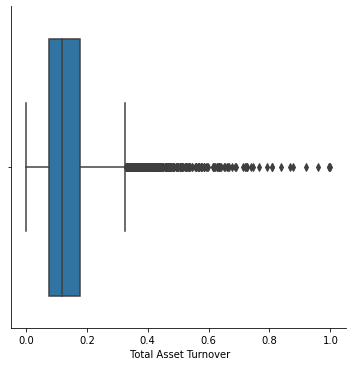

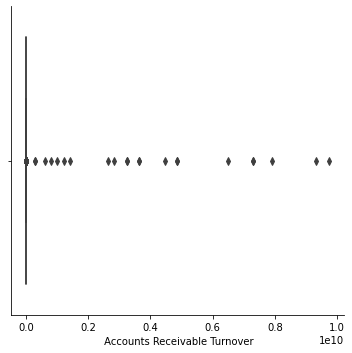

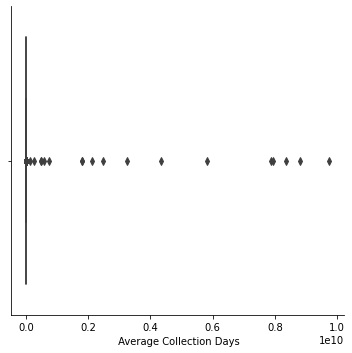

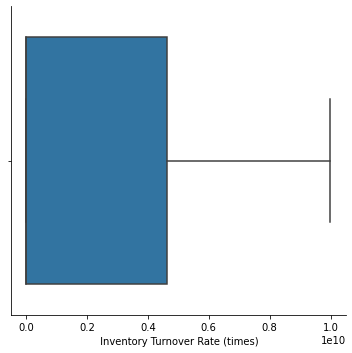

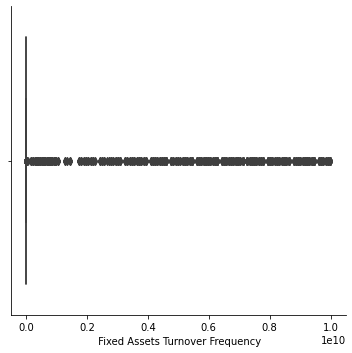

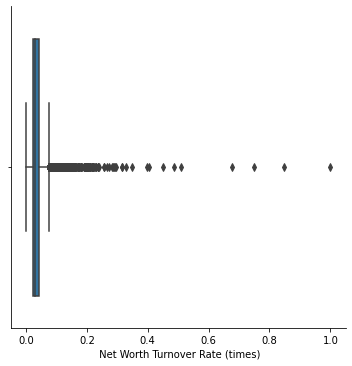

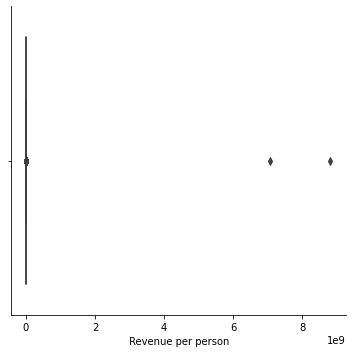

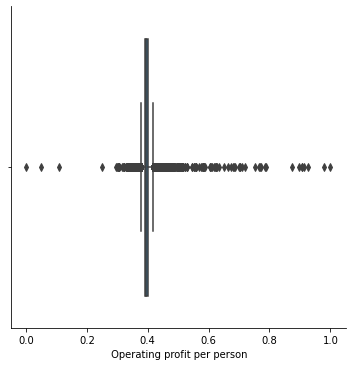

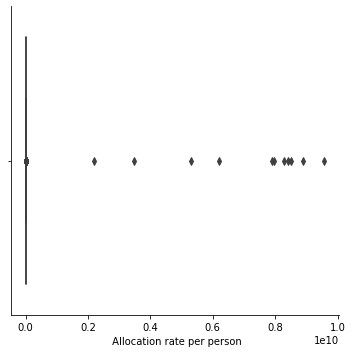

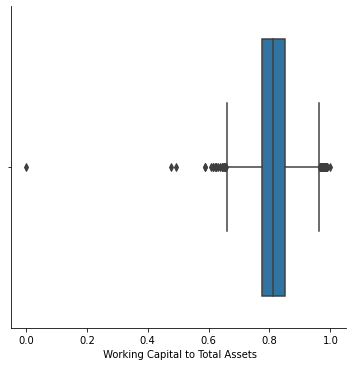

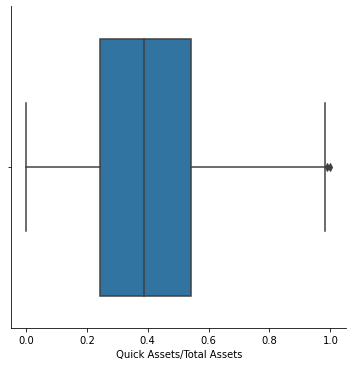

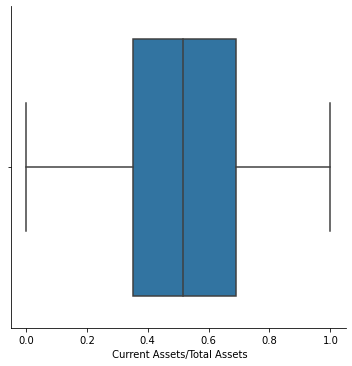

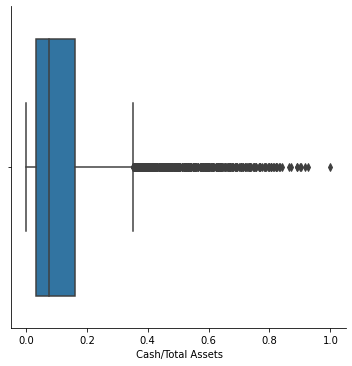

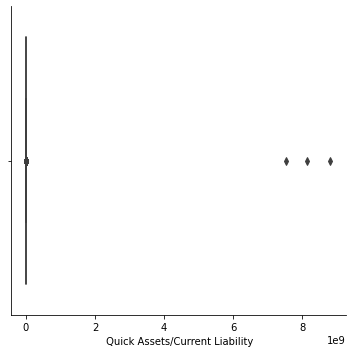

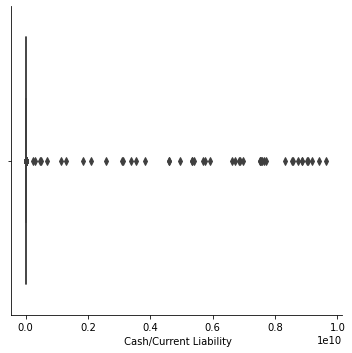

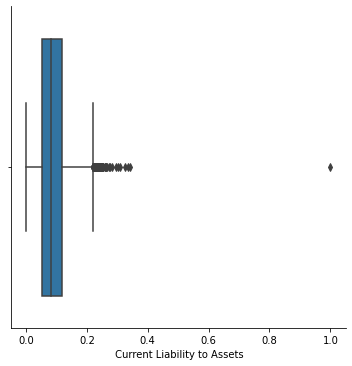

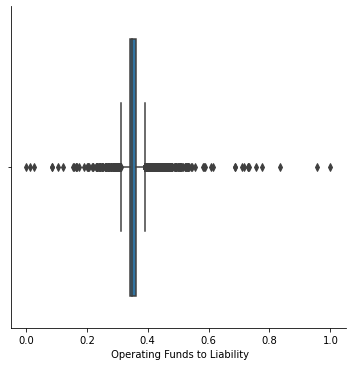

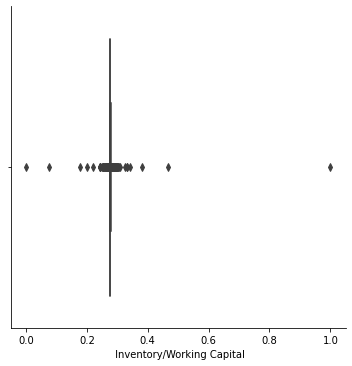

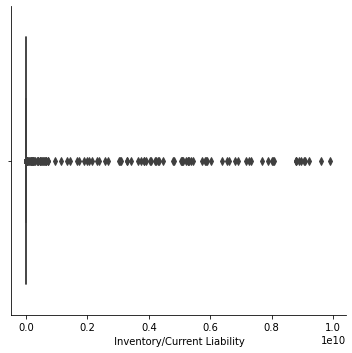

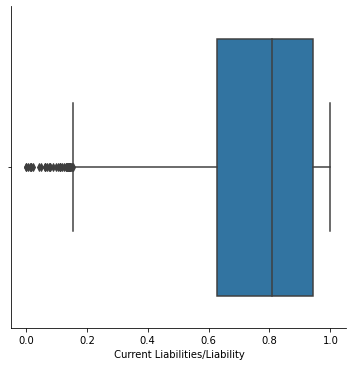

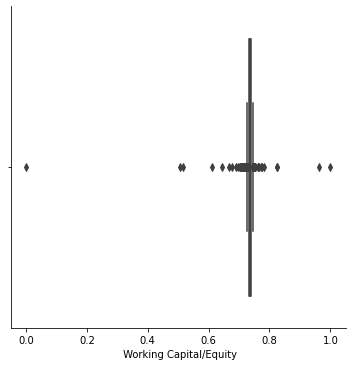

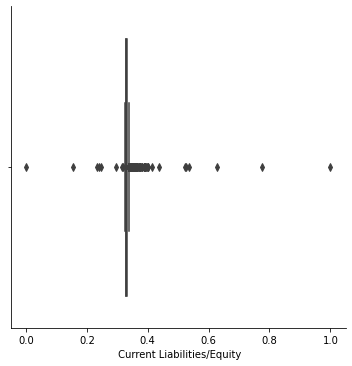

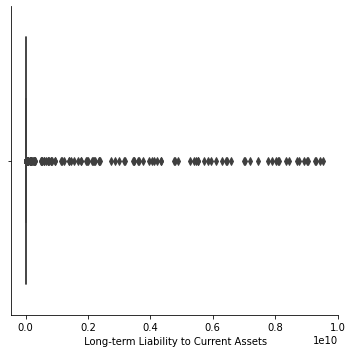

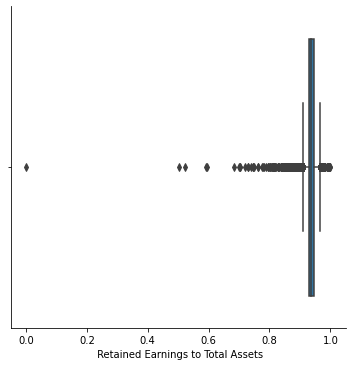

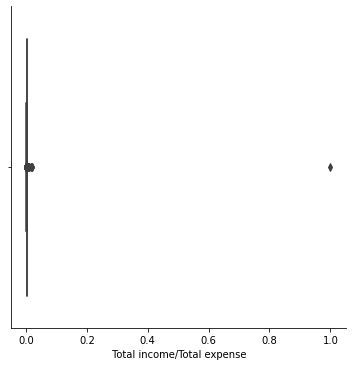

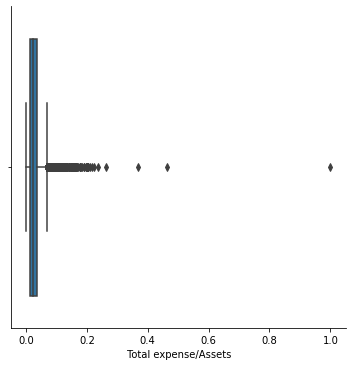

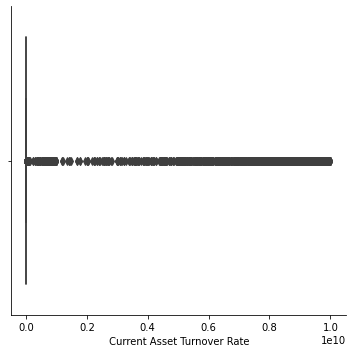

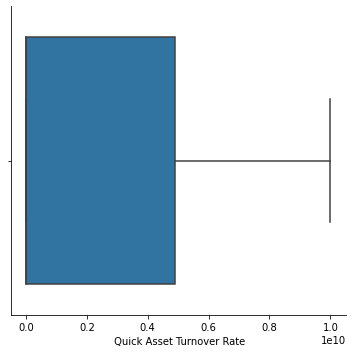

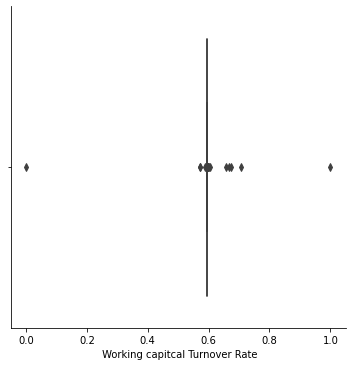

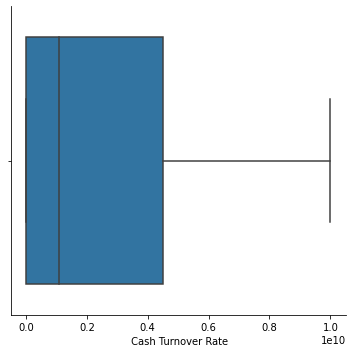

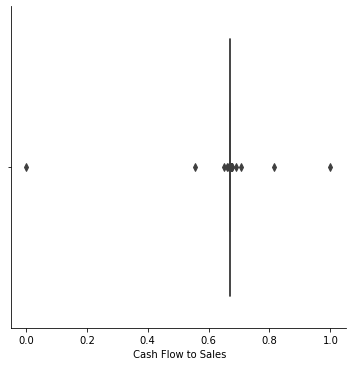

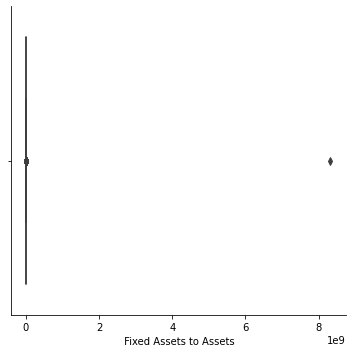

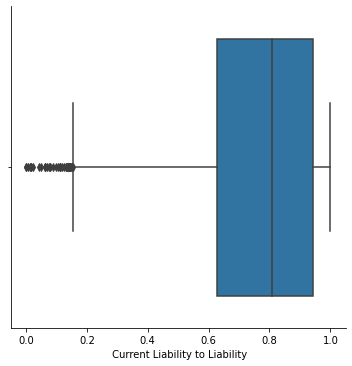

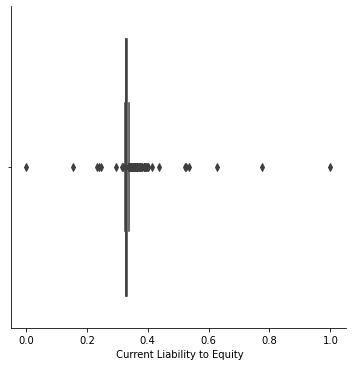

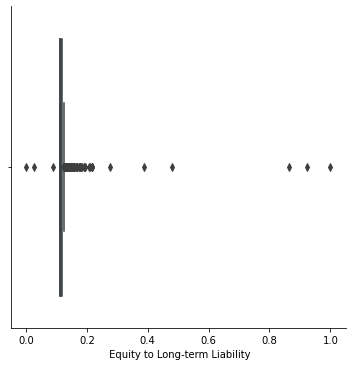

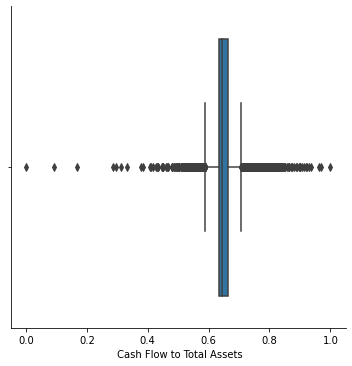

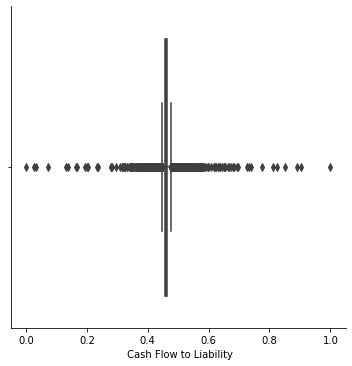

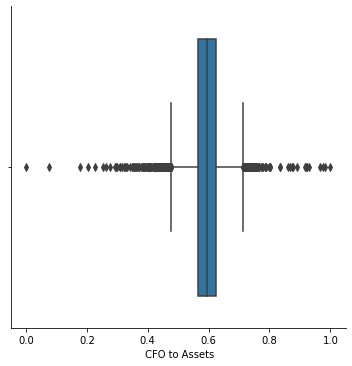

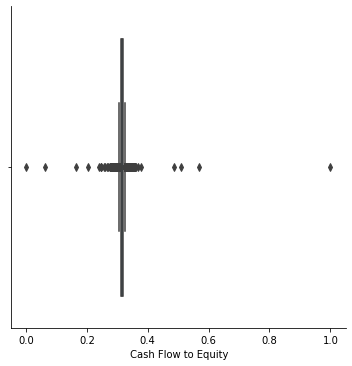

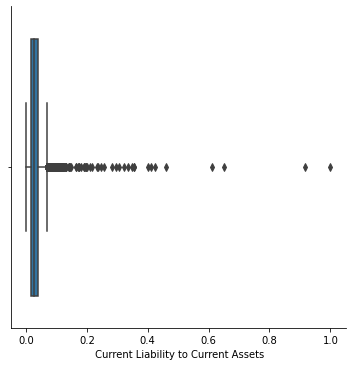

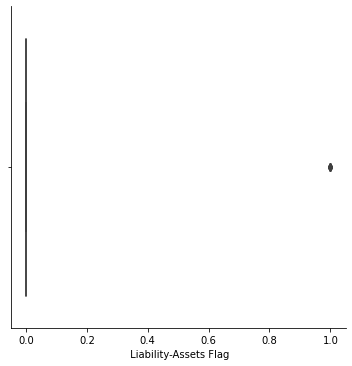

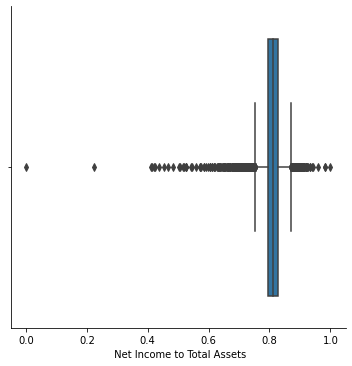

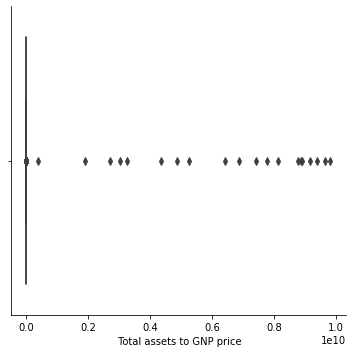

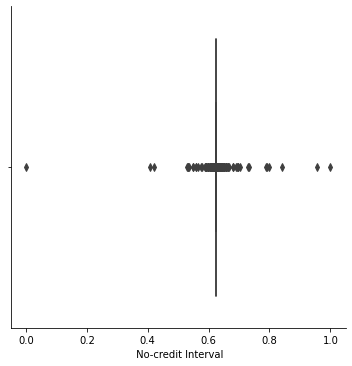

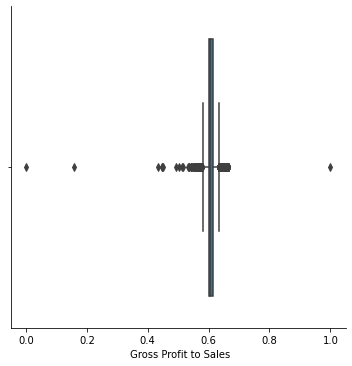

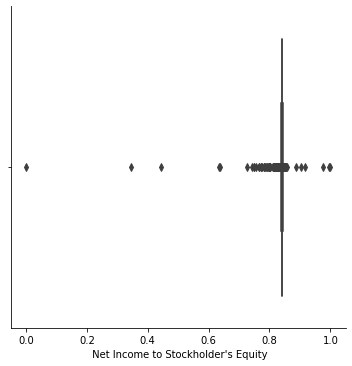

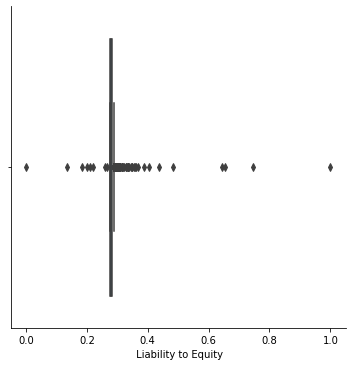

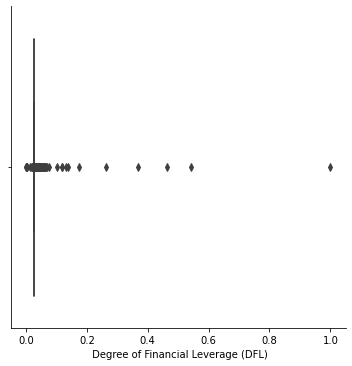

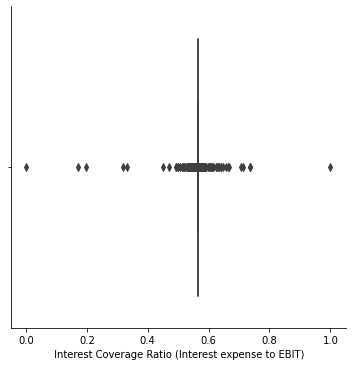

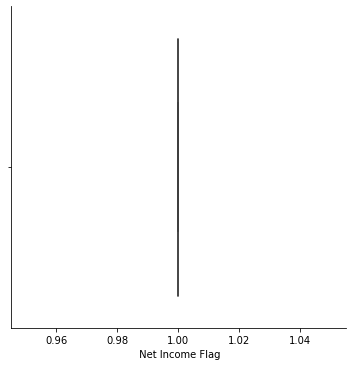

In [12]:
# Creating a Box plot of the data
for i in range(1,len(columns)-1):
    sns.catplot(x=columns[i], kind='box', data=bankrupt_data)


In [13]:
# Standardizing the data
# Importing Standard Scaler from SKLearn
from sklearn.preprocessing import StandardScaler

In [14]:
 scaler = StandardScaler()
 scaler.fit(bankrupt_data)
 scaled_data = scaler.transform(bankrupt_data)

In [15]:
# Applying PCA to the data
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [17]:
# Extracting my target variable from the data.
y = bankrupt_data['Bankrupt?']
X = bankrupt_data.drop(['Bankrupt?'], axis=1)

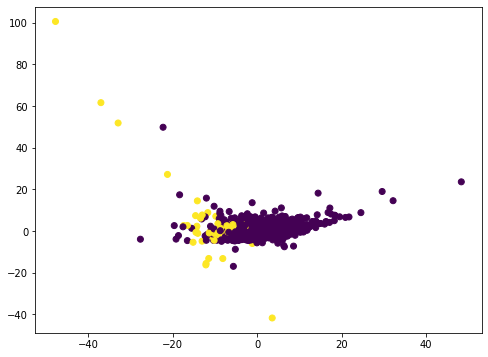

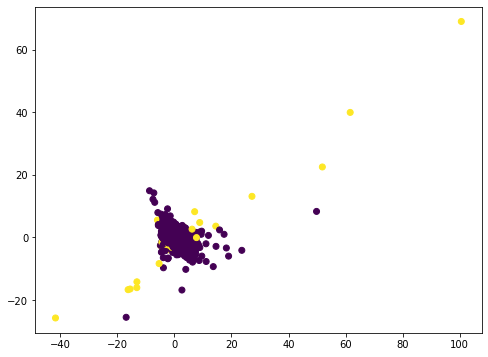

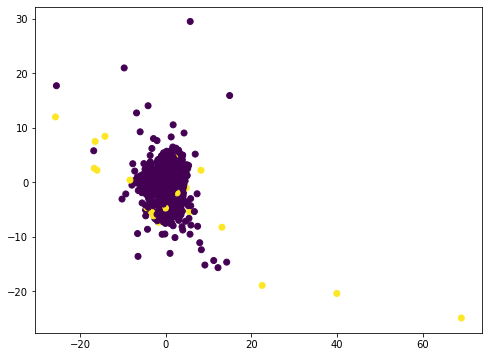

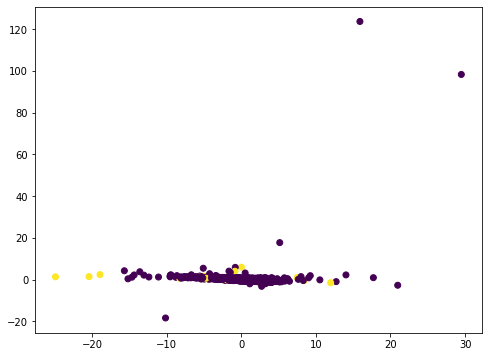

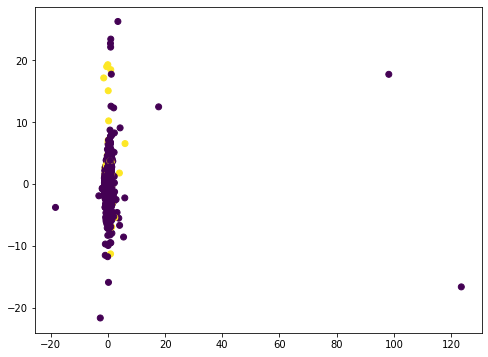

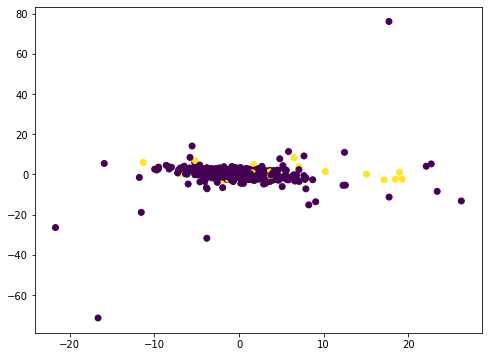

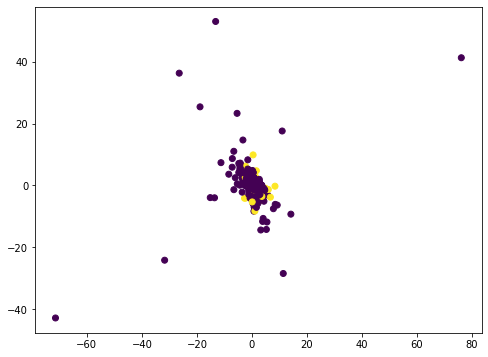

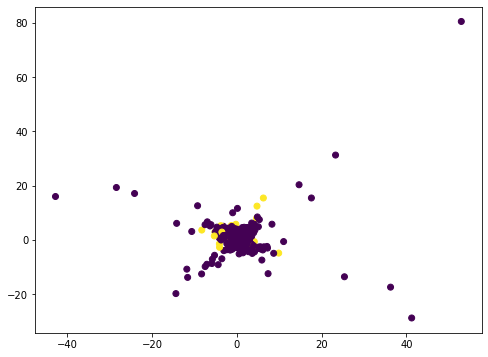

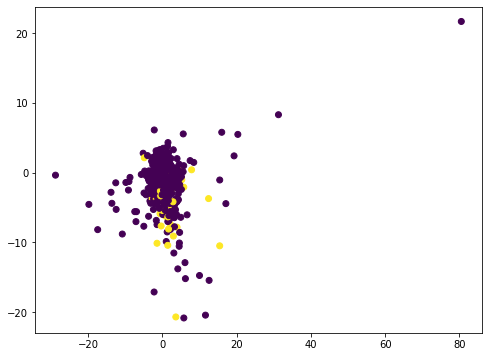

In [18]:
for i in range(9):
  plt.figure(figsize=(8,6))
  plt.scatter(x_pca[:,i],x_pca[:,i+1], c=y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-0.47310446835492437

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9671257219013771

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)

0.9471346068414038

In [23]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9768991559306974

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.964015992892048

In [25]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test,y_test)

0.9711239449133718

In [26]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)
xg.score(X_test,y_test)

0.9764549089293647

In [27]:
# Doing the above steps in a cleaner way.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




       
dfs = []
models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier())]
results, names = [], []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

LogReg
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2170
           1       0.59      0.27      0.37        81

    accuracy                           0.97      2251
   macro avg       0.78      0.63      0.68      2251
weighted avg       0.96      0.97      0.96      2251

RF
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2170
           1       0.77      0.46      0.57        81

    accuracy                           0.98      2251
   macro avg       0.88      0.73      0.78      2251
weighted avg       0.97      0.98      0.97      2251

KNN
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2170
           1       0.72      0.51      0.59        81

    accuracy                           0.98      2251
   macro avg       0.85      0.75      0.79      2251
weighted avg       0.97      0.98      0.97      2251

SVM
 

In [28]:
final

fit_time  score_time  test_accuracy  ...  test_f1_weighted  test_roc_auc   model
0   0.027230    0.006174       0.978118  ...          0.974909      0.962665  LogReg
1   0.023822    0.006474       0.966083  ...          0.958770      0.955577  LogReg
2   0.022671    0.006323       0.971554  ...          0.967978      0.968449  LogReg
3   0.020553    0.005927       0.972618  ...          0.964371      0.961577  LogReg
4   0.022195    0.005956       0.971522  ...          0.967647      0.974499  LogReg
5   0.617344    0.029534       0.984683  ...          0.982902      0.976828      RF
6   0.576701    0.028890       0.979212  ...          0.976531      0.942736      RF
7   0.557225    0.029423       0.978118  ...          0.974290      0.938536      RF
8   0.603025    0.031080       0.981380  ...          0.978811      0.956126      RF
9   0.589631    0.029536       0.981380  ...          0.979746      0.974817      RF
10  0.004077    0.080202       0.979212  ...          0.975086      0.932389     KNN
11  0.003782    0.090615       0.978118  ...          0.975566      0.859789     KNN
12  0.003941    0.087158       0.977024  ...          0.974393      0.858155     KNN
13  0.003801    0.084399       0.981380  ...          0.980802      0.932905     KNN
14  0.003766    0.094073       0.975904  ...          0.974783      0.877553     KNN
15  0.041231    0.018805       0.981400  ...          0.978368      0.970374     SVM
16  0.040951    0.017905       0.980306  ...          0.978468      0.968400     SVM
17  0.040048    0.018385       0.979212  ...          0.976358      0.981016     SVM
18  0.043456    0.019479       0.983571  ...          0.980744      0.989955     SVM
19  0.041857    0.019126       0.982475  ...          0.979441      0.978945     SVM
20  0.001687    0.004526       0.950766  ...          0.954273      0.930223     GNB
21  0.001534    0.004231       0.950766  ...          0.946710      0.852062     GNB
22  0.001426    0.004173       0.949672  ...          0.948156      0.901270     GNB
23  0.001428    0.005377       0.958379  ...          0.956616      0.924910     GNB
24  0.001421    0.004231       0.955093  ...          0.955558      0.927504     GNB
25  0.236456    0.009284       0.989059  ...          0.988089      0.961192     XGB
26  0.235506    0.008309       0.983589  ...          0.982237      0.972144     XGB
27  0.234859    0.008415       0.979212  ...          0.976358      0.962132     XGB
28  0.240208    0.008237       0.987952  ...          0.987577      0.978784     XGB
29  0.233998    0.008192       0.981380  ...          0.980271      0.975379     XGB

[30 rows x 8 columns]

In [29]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

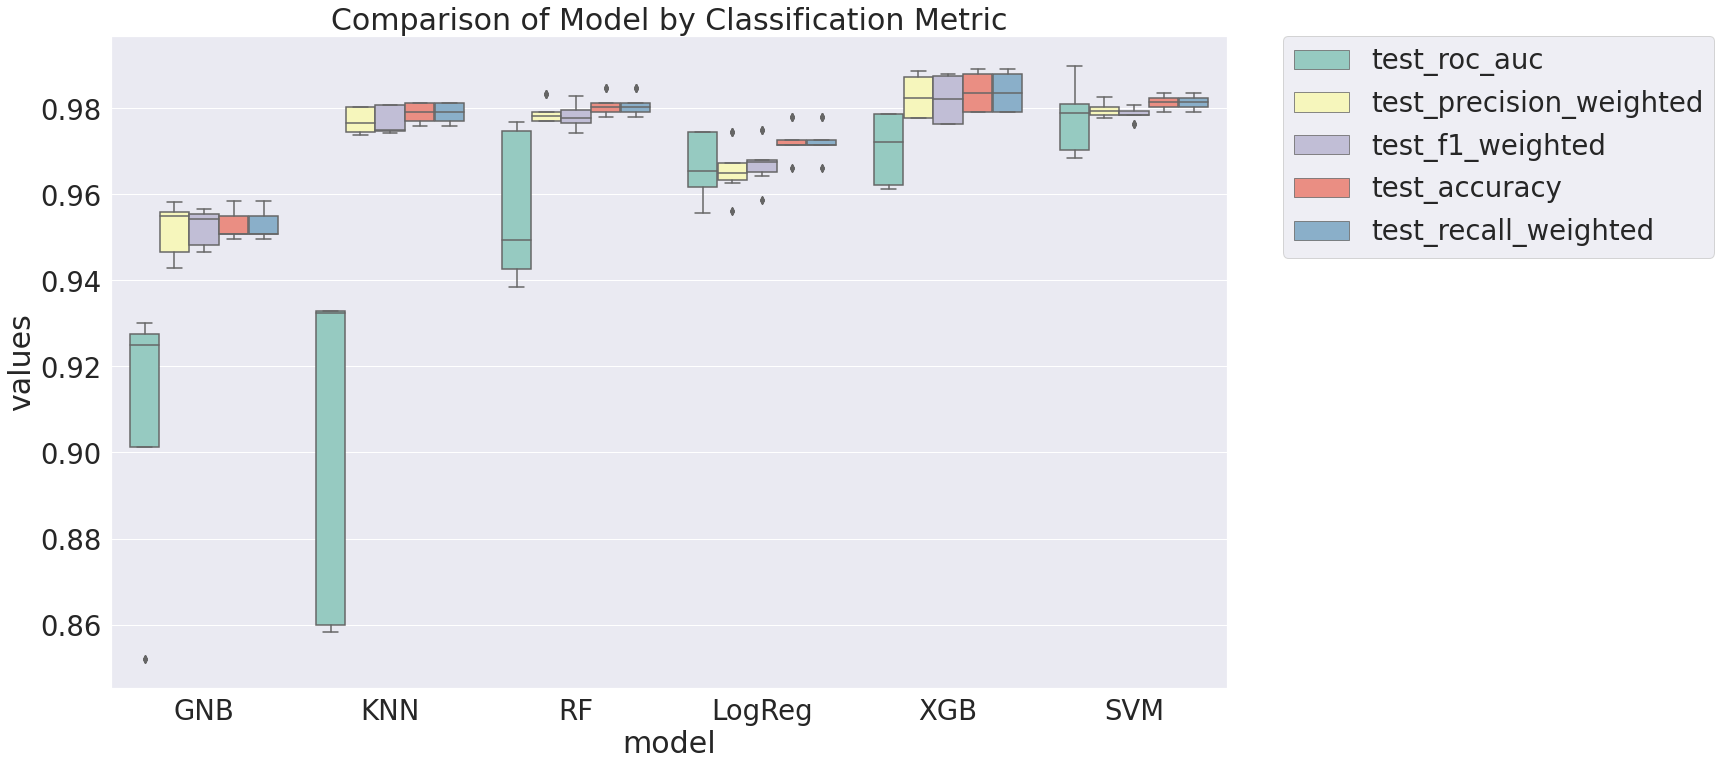

In [30]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

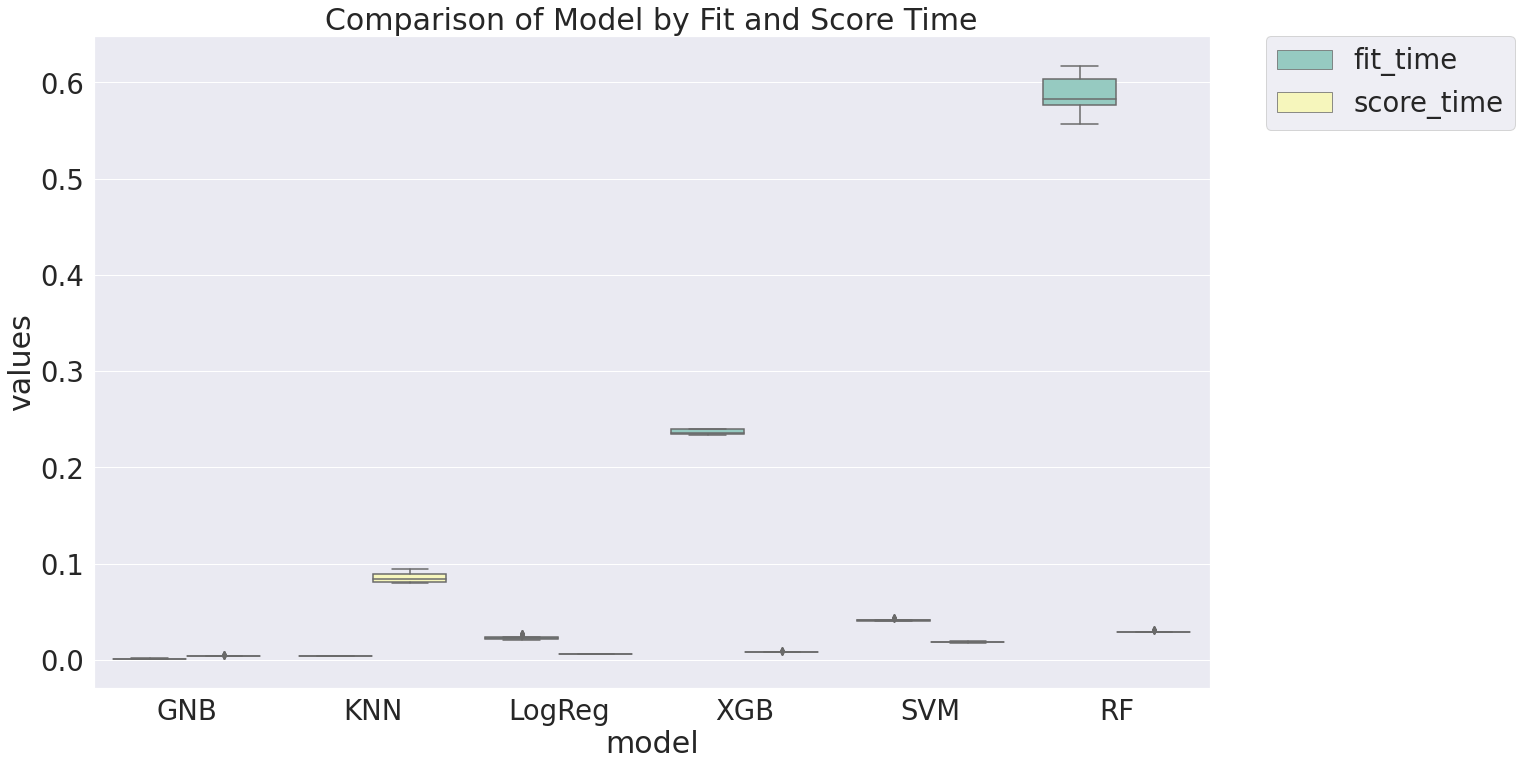

In [31]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [32]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy            ... test_f1_weighted          
                 std      mean  ...              std      mean
model                           ...                           
GNB         0.003455  0.953333  ...         0.003920  0.952888
KNN         0.001966  0.978911  ...         0.002746  0.976709
LogReg      0.003510  0.972706  ...         0.004759  0.967974
RF          0.002415  0.980884  ...         0.003037  0.978346
SVM         0.001537  0.981465  ...         0.001433  0.978701
XGB         0.004127  0.984276  ...         0.005048  0.982854

[6 rows x 10 columns]

In [33]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
GNB      0.000483  0.004546  0.000106  0.001492
KNN      0.004712  0.085858  0.000128  0.003890
LogReg   0.000192  0.006127  0.002348  0.023354
RF       0.000746  0.029559  0.021306  0.588619
SVM      0.000535  0.018779  0.001095  0.041506
XGB      0.000379  0.008470  0.002415  0.236730